In [9]:
#Firstly Installing all required libraries

import numpy as np 
import pandas as pd 

#for visual representation of data
import matplotlib.pyplot as plt
import seaborn as sns

loading the library

In [11]:
Data = pd.read_csv ("/kaggle/input/housing/AmesHousing.csv")

now, to understand what does our data actually contain, we use .info and .head from pandas library.

.info() tells me the total row and column, datatype of each column, null values
.head() gives me the top 5 rows of the dataset

In [3]:
print(Data.info())
print(Data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Now we start **Data Cleaning**
1.identify where data is missing 
2. correct it either by 
 a. filling it with a specific value
 b. filling it with values from another column
 c. filling it with the mean of other values

 we start by looking at the type of garages we have, and filling out the missing value. We notice that Garage Type has a lot of missing values.

In [5]:
print (Data['Garage Type'].isnull().sum())
Data [Data['Garage Type'].isnull()]

157


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
27,28,527425090,20,RL,70.0,10500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,ConLI,Normal,115000
119,120,534276360,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950
125,126,534427010,90,RL,98.0,13260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml,84900
129,130,534450180,20,RL,50.0,7207,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,116500
130,131,534451150,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2914,923226180,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,73000
2916,2917,923228130,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
2918,2919,923228210,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,79500
2919,2920,923228260,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,90500


lets fill this value, by one specific value.

In [6]:
Data['Garage Type'] = Data['Garage Type'].fillna('dont know')
print (Data['Garage Type'].isnull().sum())

0


we verify if the value was set rightly

In [ ]:
Data[Data['Garage Type']=='dont know']

we can make some basic assumptions, like the year the garage was built was the same as the year house was built so we can add values there.

In [12]:
Data['Garage Yr Blt'] = Data['Garage Yr Blt'].fillna(Data['Year Built'])


Next, we can look at lot frontage, we can run with the assumption that the same lot frontage for houses in the same neighbourhood. So, first we group the data by neighbourhood, and then for each neighbourhood we take the median area, and then put that value in the missing Value.

In [13]:
Data['Lot Frontage']= Data.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(x.median()))


lets see if we have any other problems like duplicate entries. We remove them by .drop()

In [14]:
print("Number of duplicate rows:", Data.duplicated().sum())
Data = Data.drop_duplicates()

Number of duplicate rows: 0


outliers are some data points that differ a lot from the other data points. outliers can mess with our understanding of data and produce false results, so we remove them.1. 

Now, we define a function that finds out outliers based on a dataframe and its column assigned to it. It uses the Interquartile Range (IQR) method to detect and remove outliers. IQR is a commonly used stastical method which defines a lower and upper bound of a dataset using the 25th, 75th percentile and a multiplier.

Let's look at the function in detail, first we take a column, find the 25th and 75th percentile of all the entries. we call them Q1 and Q2, and we take their difference. This difference is called the interquartile Range (IQR) and using this we define the lower and upper bounds. 

We then return a dataframe with only those values that lie within these bounds

In [15]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

Now, lets run this function for our code,this line selects the columns with numerical data types, make a list of such columns. Now, we run our function on each column in the list.  

In [19]:
numerical_columns = Data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    Data = remove_outliers(Data,col)

Exploratory Data Analysis 

In [20]:
print(Data.describe())

             Order           PID  MS SubClass  Lot Frontage      Lot Area  \
count   243.000000  2.430000e+02   243.000000    243.000000    243.000000   
mean   1501.876543  7.035960e+08    49.259259     69.839506   9516.279835   
std     844.909160  1.897992e+08    19.840965      9.028934   1563.862868   
min       5.000000  5.271050e+08    20.000000     44.000000   6931.000000   
25%     846.500000  5.282352e+08    20.000000     64.000000   8450.000000   
50%    1578.000000  5.313821e+08    60.000000     68.000000   9100.000000   
75%    2173.500000  9.071951e+08    60.000000     74.000000  10382.000000   
max    2888.000000  9.232050e+08    80.000000     96.000000  13830.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count    243.000000         243.0   243.000000      243.000000    243.000000   
mean       6.736626           5.0  2001.460905     2001.851852     48.012346   
std        0.695749           0.0     4.632966        4.480752    

We start our exploratory data analysis by using the command describe to give a rough start to our analysis with some basic stastical numbers. For each numerical column, the following statistics are calculated:

count: The number of non-null (non-missing) values.
mean: The average value of the column.
std: The standard deviation, which measures the spread of the data.
min: The minimum value in the column.
25%: The 25th percentile (first quartile, Q1).
50%: The 50th percentile (median).
75%: The 75th percentile (third quartile, Q3).
max: The maximum value in the column. 

Frequency distributions for categorical variables

MS Zoning
RL    222
FV     21
Name: count, dtype: int64


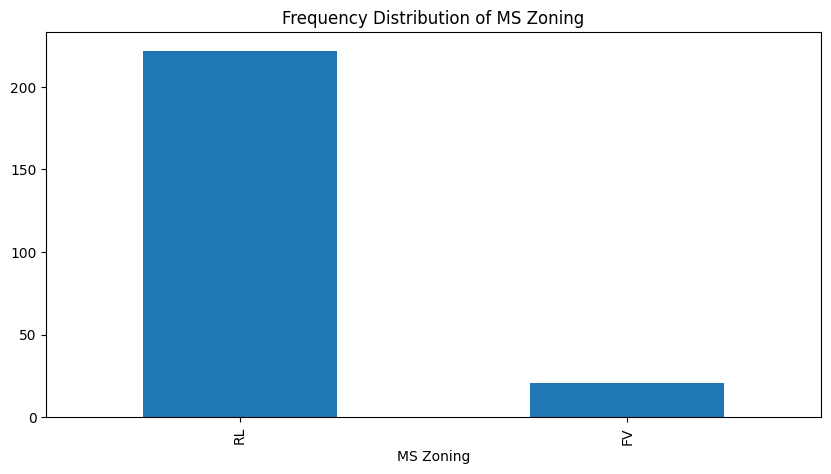

Street
Pave    243
Name: count, dtype: int64


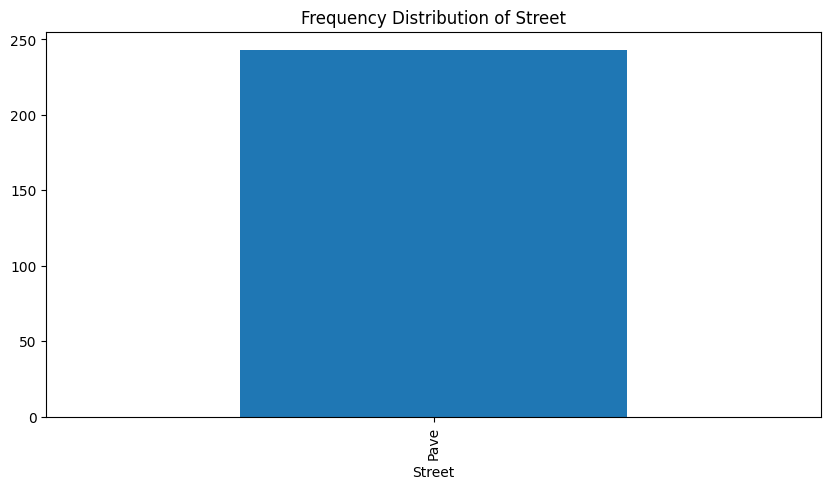

Alley
Pave    1
Name: count, dtype: int64


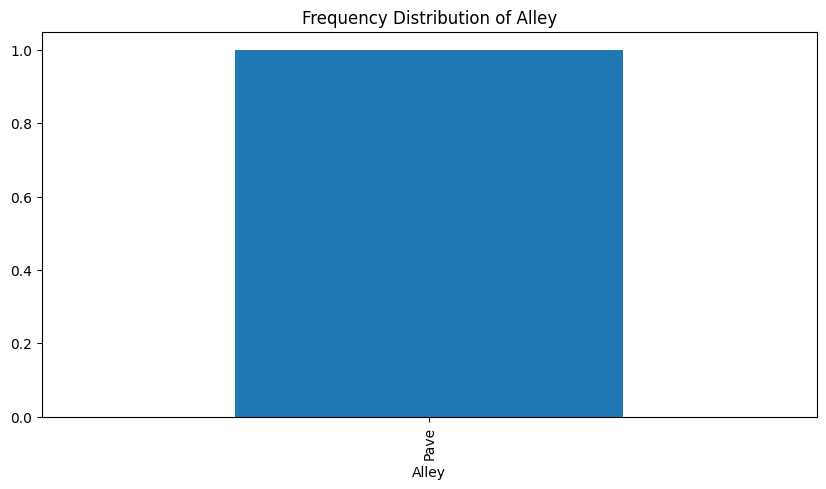

Lot Shape
IR1    127
Reg    111
IR2      5
Name: count, dtype: int64


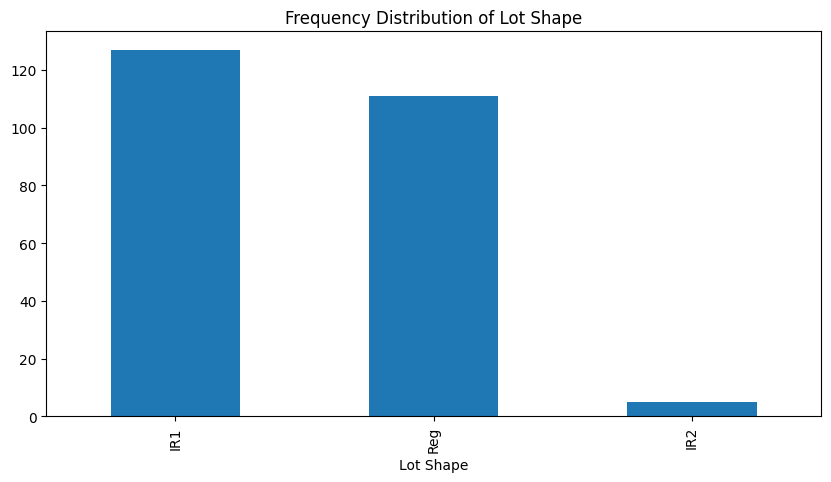

Land Contour
Lvl    238
HLS      5
Name: count, dtype: int64


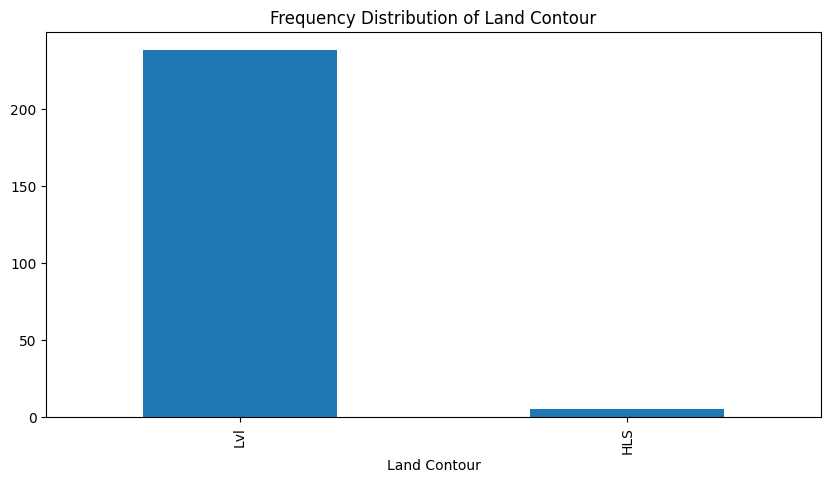

Utilities
AllPub    243
Name: count, dtype: int64


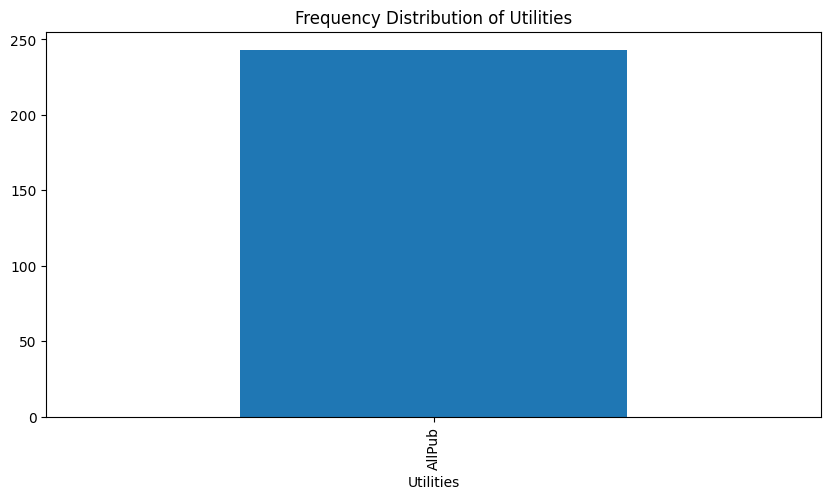

Lot Config
Inside     189
Corner      32
CulDSac     13
FR2          9
Name: count, dtype: int64


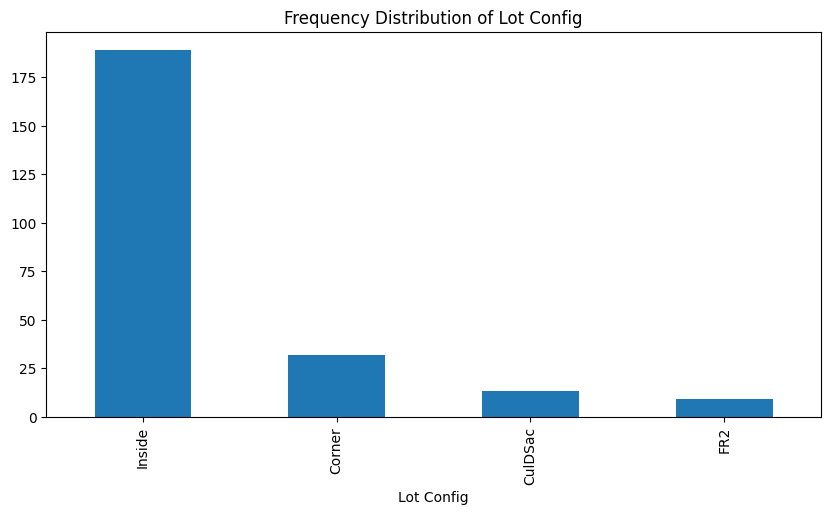

Land Slope
Gtl    242
Mod      1
Name: count, dtype: int64


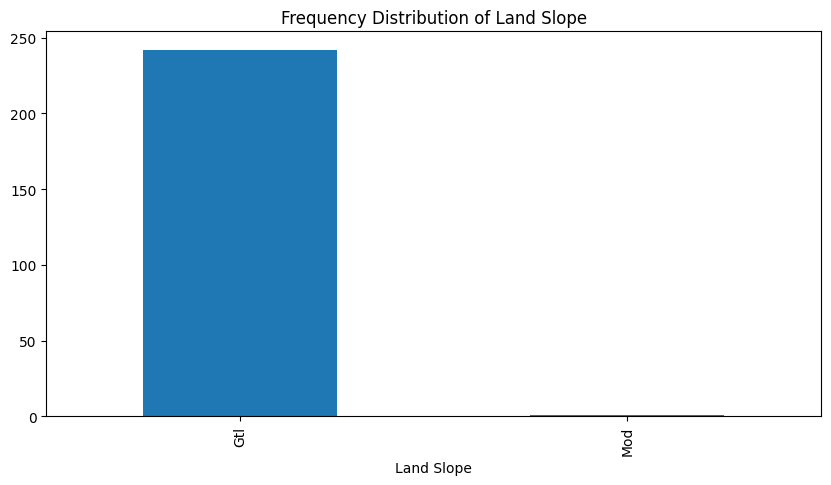

Neighborhood
CollgCr    87
Gilbert    80
Somerst    29
SawyerW    25
Timber     10
Mitchel     5
Edwards     4
NridgHt     3
Name: count, dtype: int64


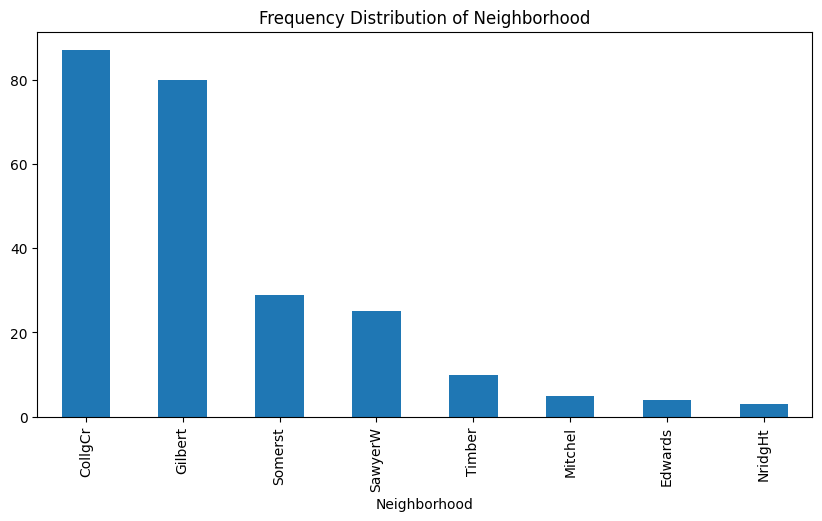

Condition 1
Norm     226
RRAn      10
RRAe       2
PosN       2
RRNn       1
RRNe       1
Feedr      1
Name: count, dtype: int64


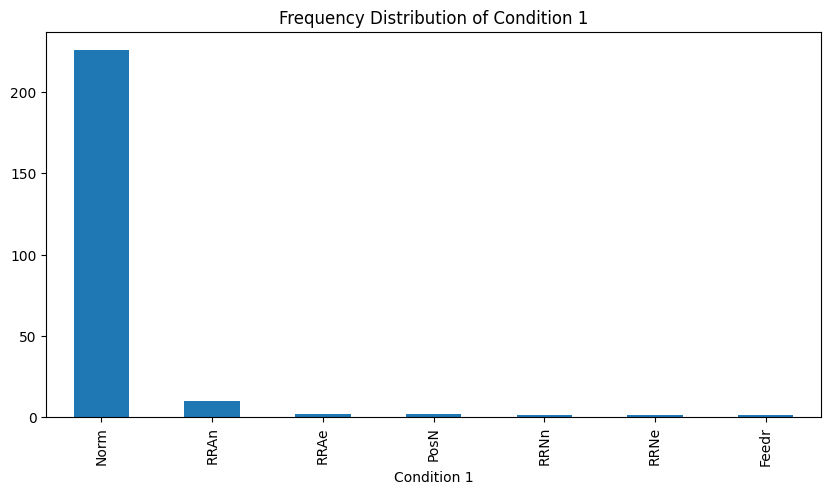

Condition 2
Norm    243
Name: count, dtype: int64


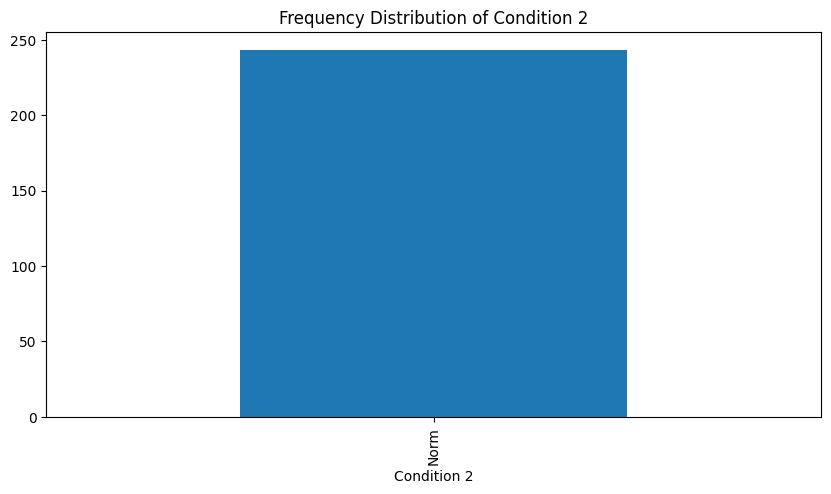

Bldg Type
1Fam    243
Name: count, dtype: int64


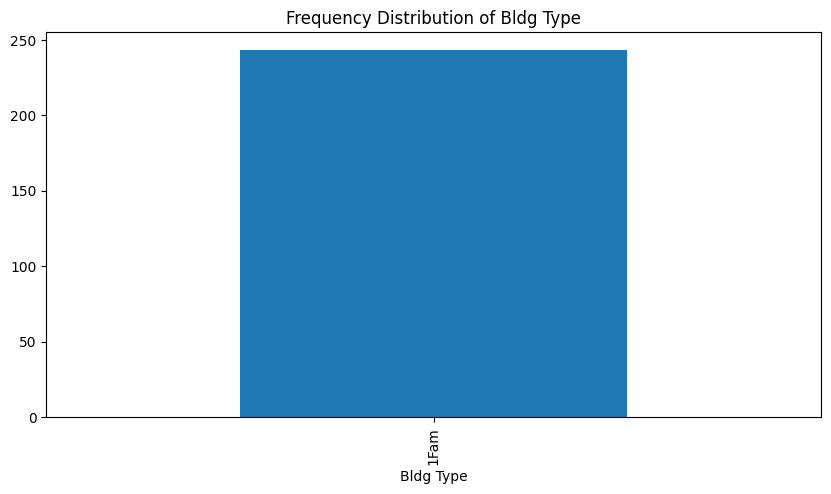

House Style
2Story    153
1Story     73
SLvl       16
1.5Fin      1
Name: count, dtype: int64


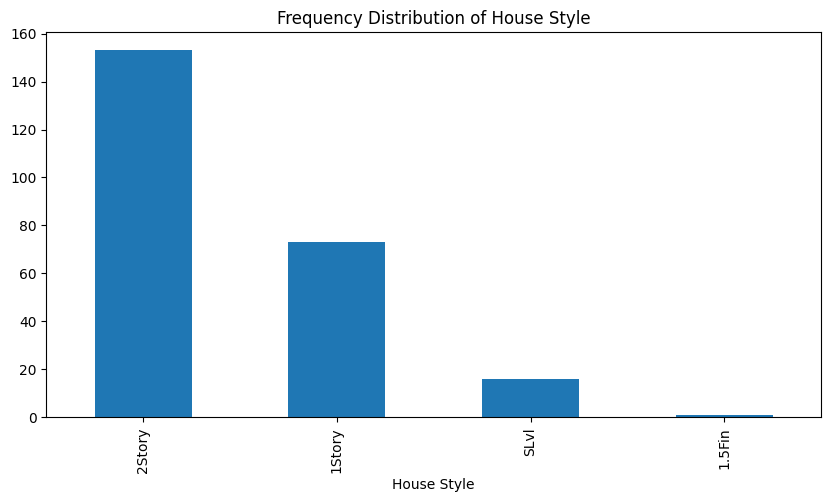

Roof Style
Gable    232
Hip       11
Name: count, dtype: int64


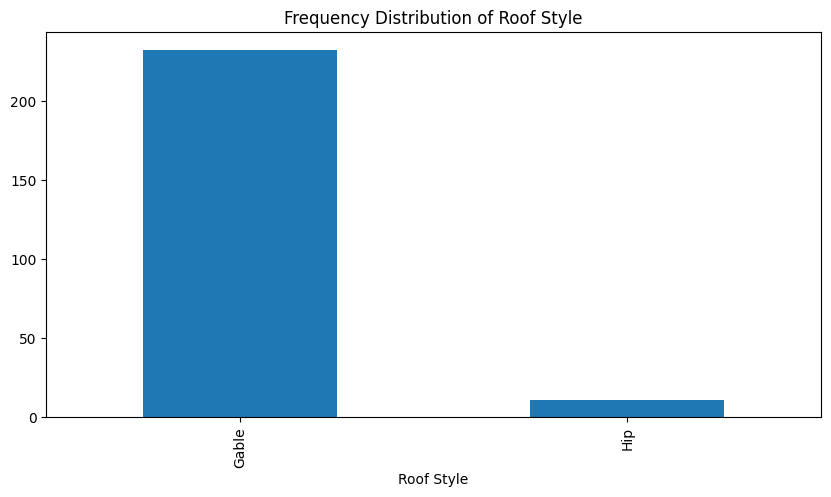

Roof Matl
CompShg    243
Name: count, dtype: int64


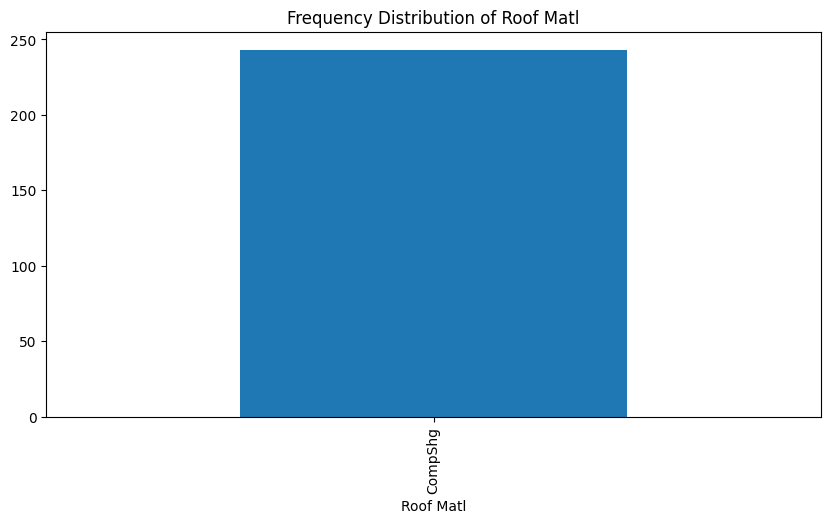

Exterior 1st
VinylSd    210
HdBoard     25
CemntBd      4
MetalSd      2
WdShing      2
Name: count, dtype: int64


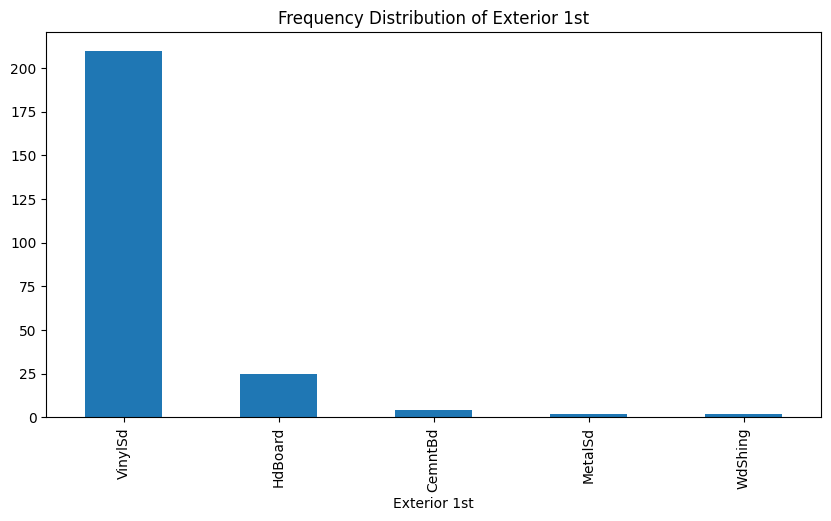

Exterior 2nd
VinylSd    210
HdBoard     24
CmentBd      4
MetalSd      2
Wd Shng      2
Stucco       1
Name: count, dtype: int64


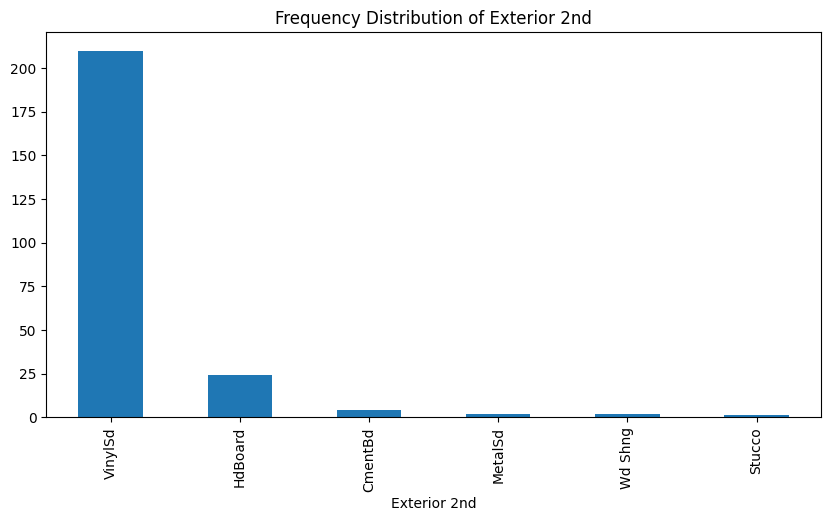

Mas Vnr Type
BrkFace    74
Stone      10
Name: count, dtype: int64


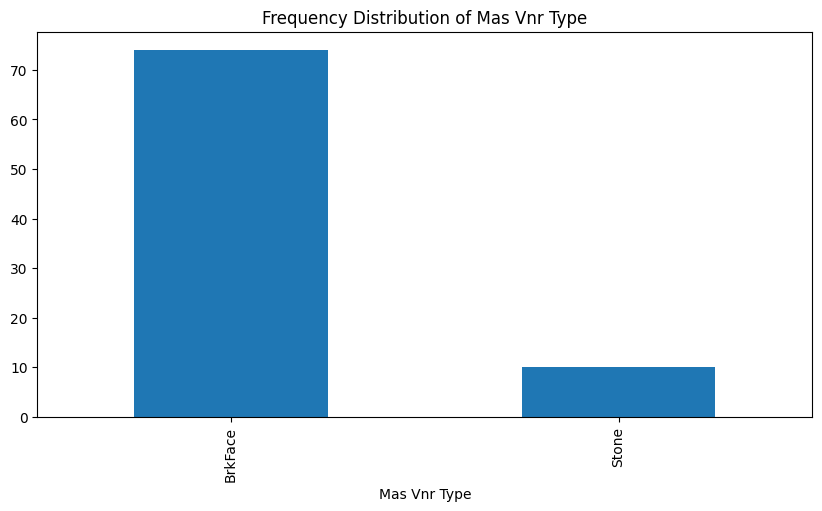

Exter Qual
Gd    172
TA     71
Name: count, dtype: int64


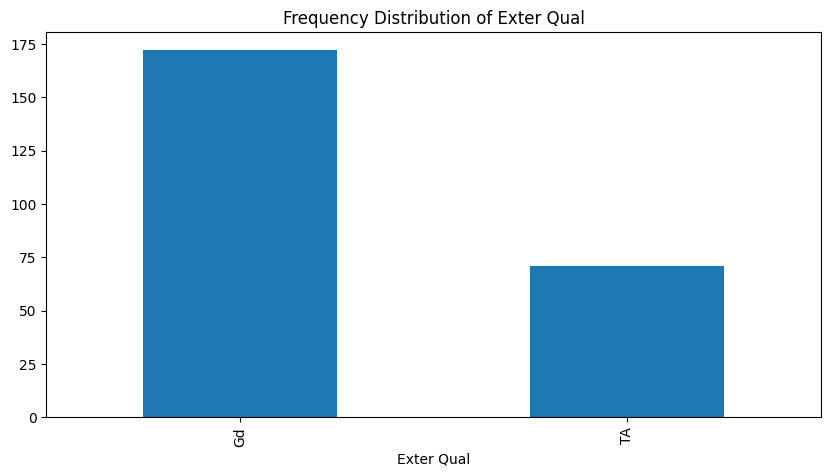

Exter Cond
TA    239
Gd      4
Name: count, dtype: int64


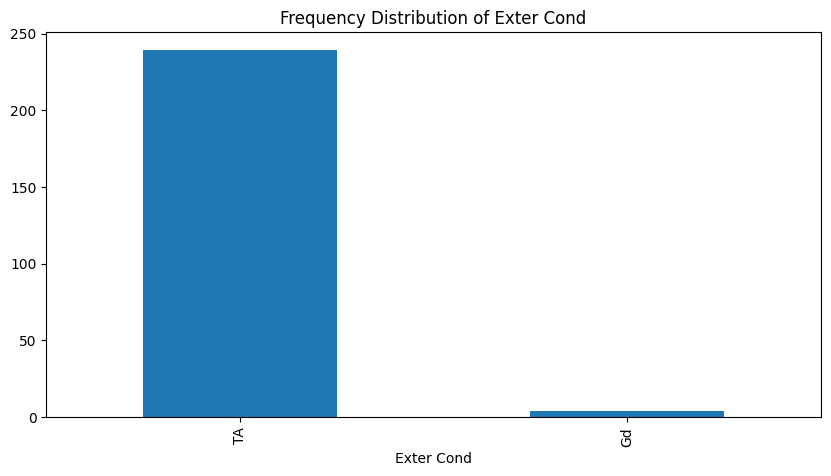

Foundation
PConc     240
CBlock      3
Name: count, dtype: int64


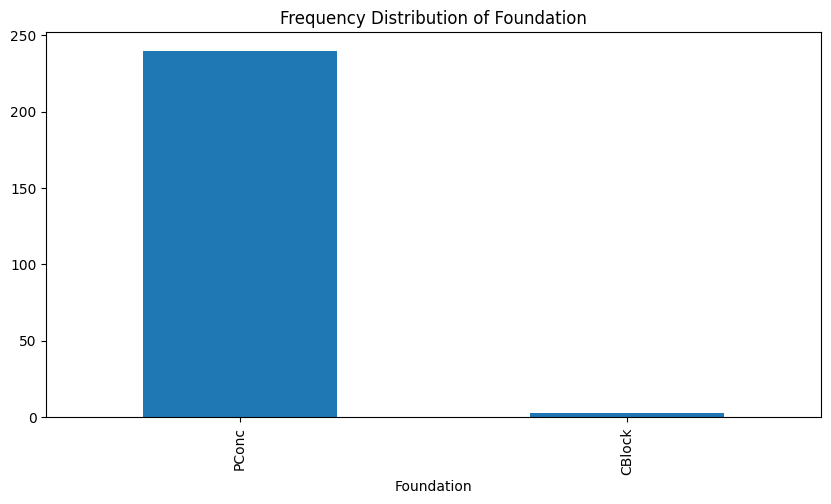

Bsmt Qual
Gd    230
Ex     10
TA      3
Name: count, dtype: int64


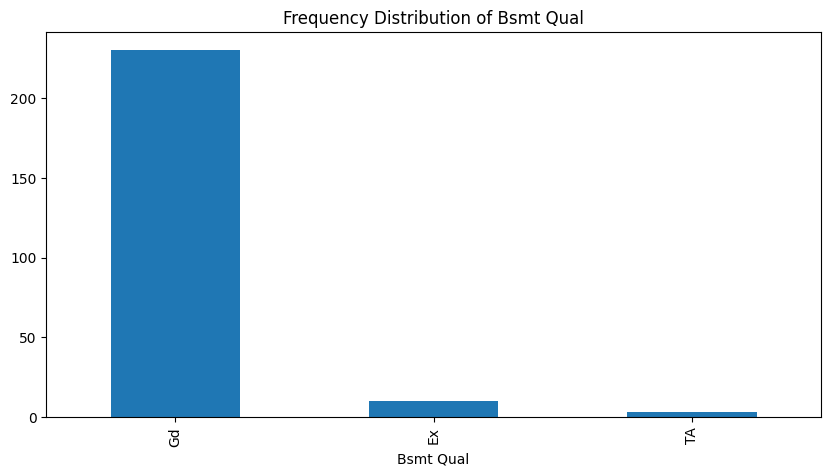

Bsmt Cond
TA    233
Gd     10
Name: count, dtype: int64


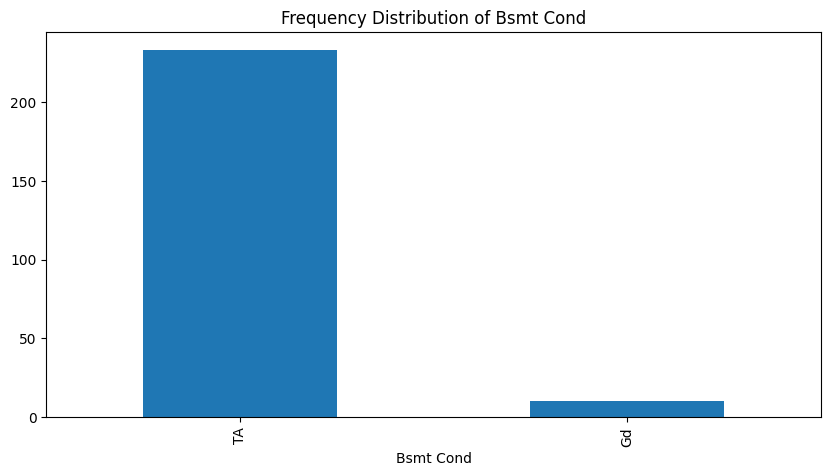

Bsmt Exposure
No    161
Av     44
Mn     25
Gd     13
Name: count, dtype: int64


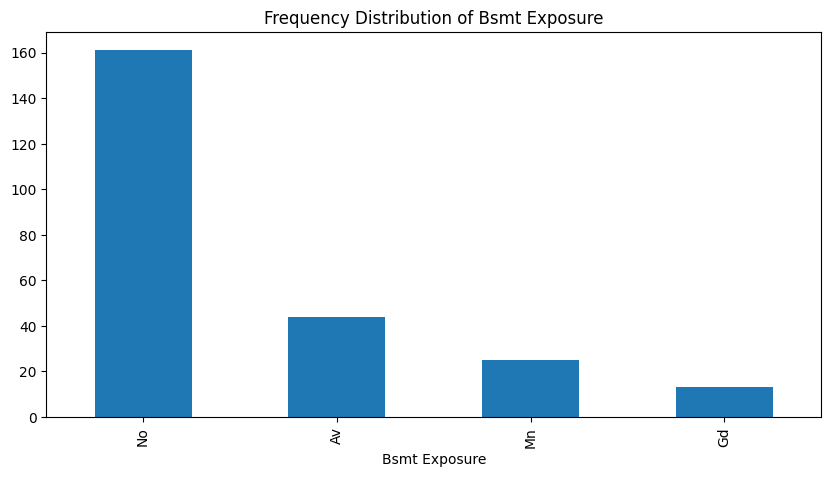

BsmtFin Type 1
Unf    116
GLQ    109
ALQ     12
BLQ      2
Rec      2
LwQ      2
Name: count, dtype: int64


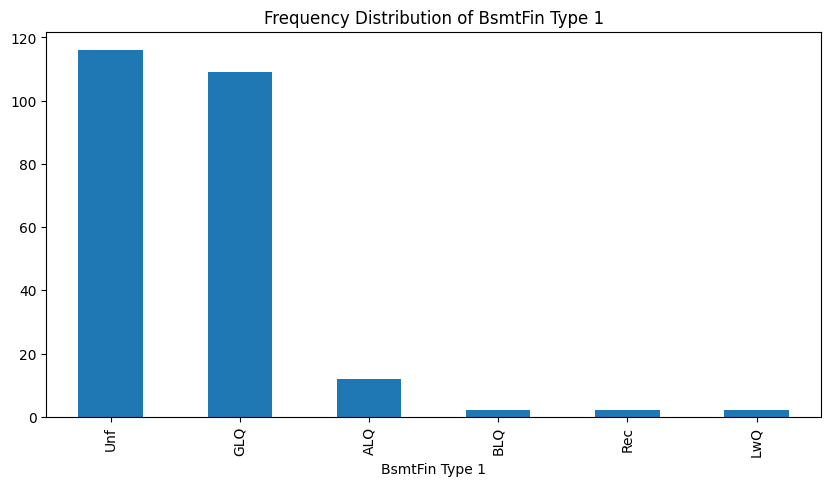

BsmtFin Type 2
Unf    243
Name: count, dtype: int64


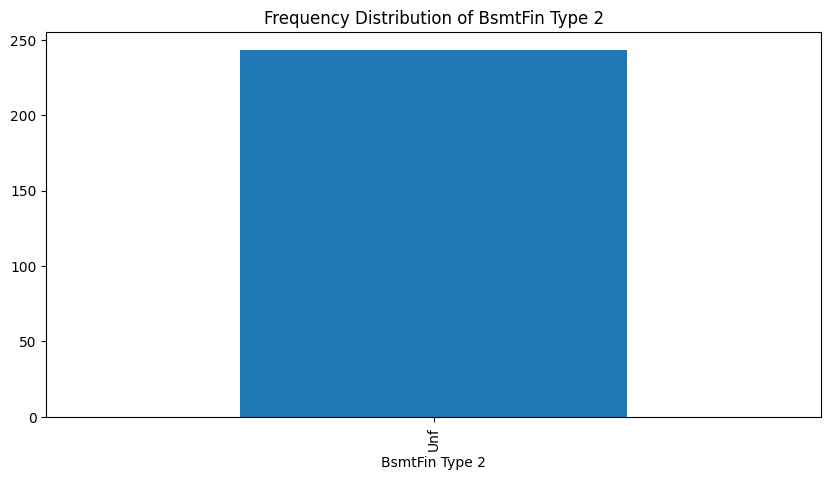

Heating
GasA    243
Name: count, dtype: int64


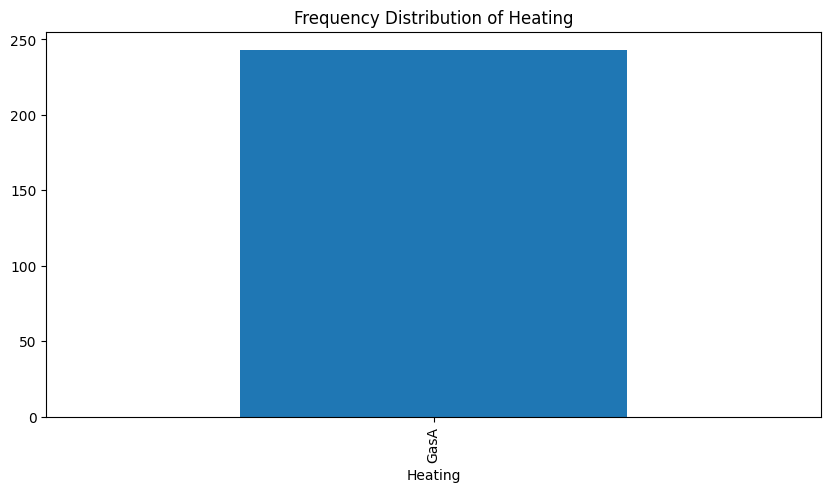

Heating QC
Ex    202
Gd     40
TA      1
Name: count, dtype: int64


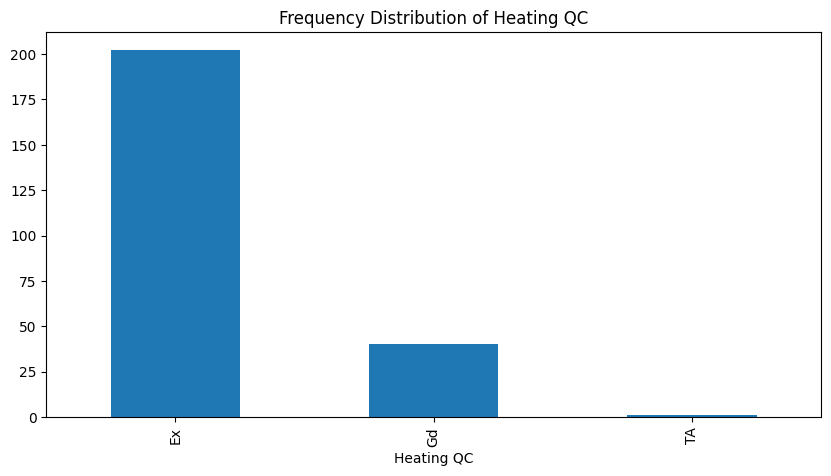

Central Air
Y    243
Name: count, dtype: int64


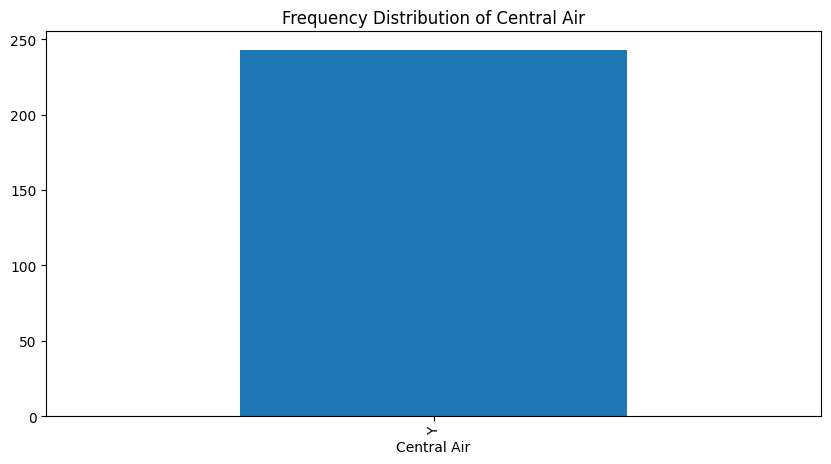

Electrical
SBrkr    242
Name: count, dtype: int64


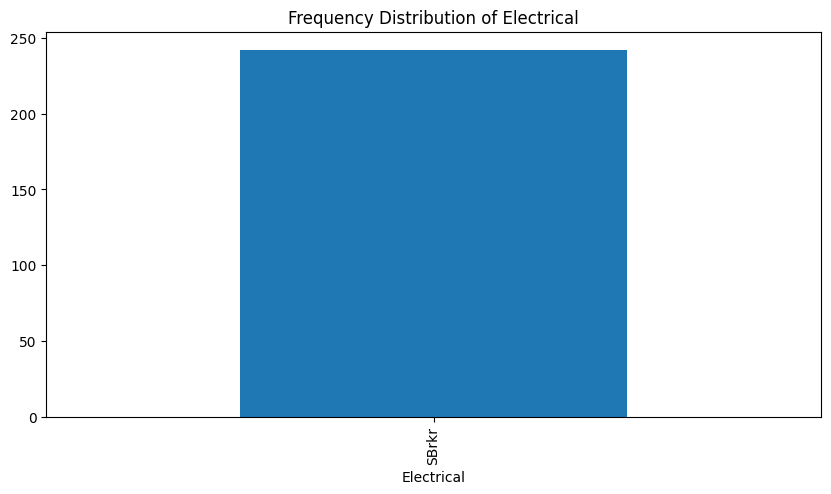

Kitchen Qual
Gd    193
TA     47
Ex      3
Name: count, dtype: int64


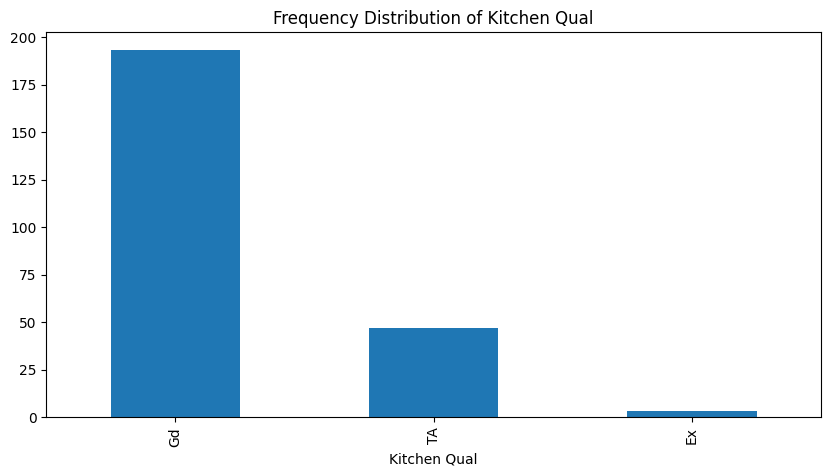

Functional
Typ    243
Name: count, dtype: int64


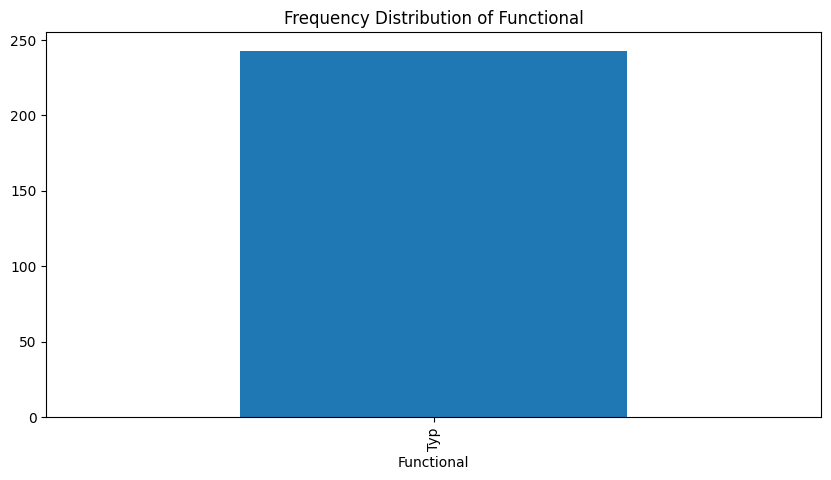

Fireplace Qu
TA    72
Gd    54
Fa     3
Ex     1
Name: count, dtype: int64


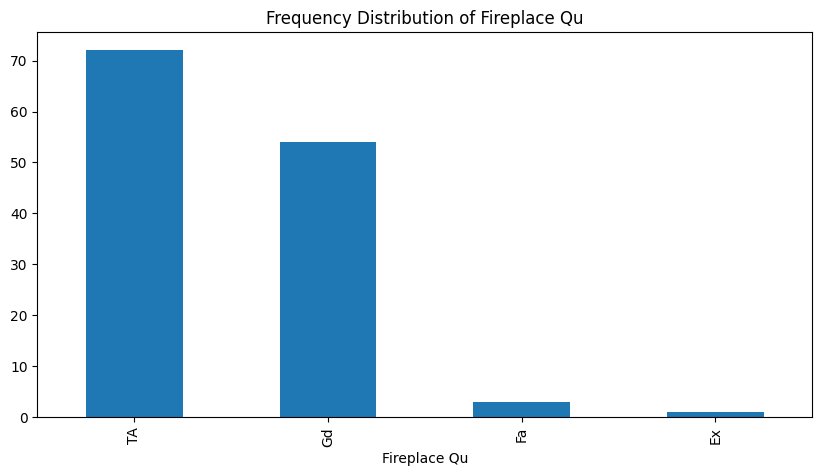

Garage Type
Attchd     209
BuiltIn     33
Detchd       1
Name: count, dtype: int64


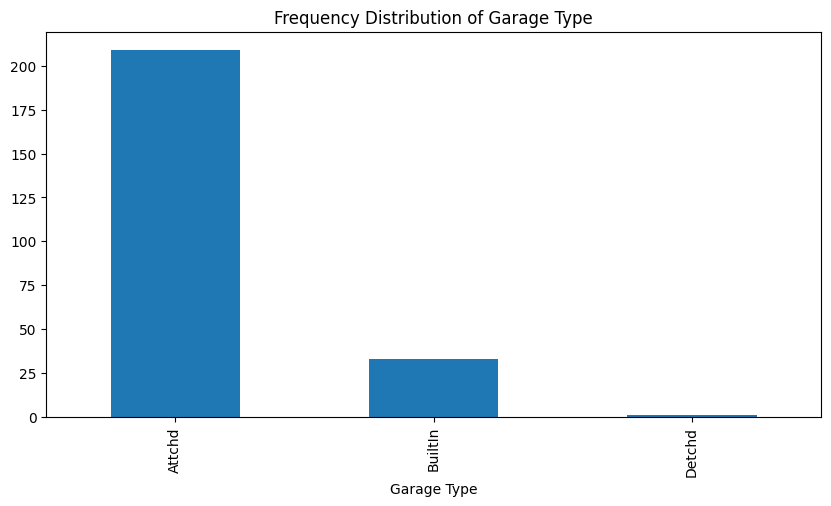

Garage Finish
RFn    119
Fin    114
Unf     10
Name: count, dtype: int64


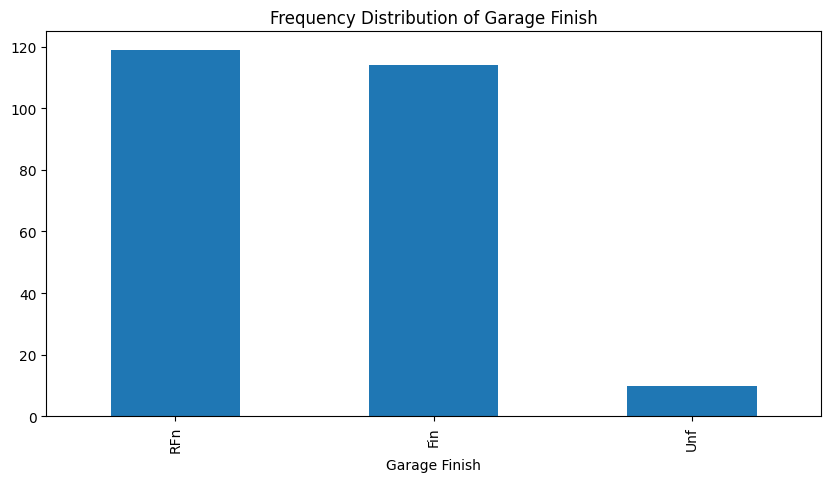

Garage Qual
TA    243
Name: count, dtype: int64


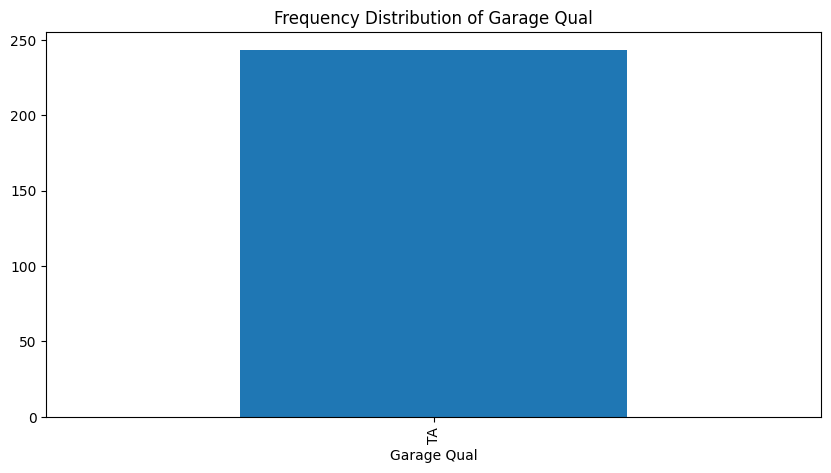

Garage Cond
TA    243
Name: count, dtype: int64


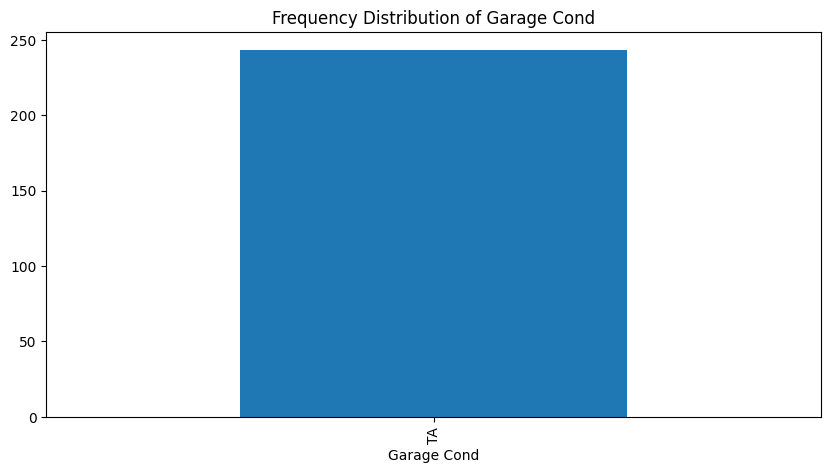

Paved Drive
Y    243
Name: count, dtype: int64


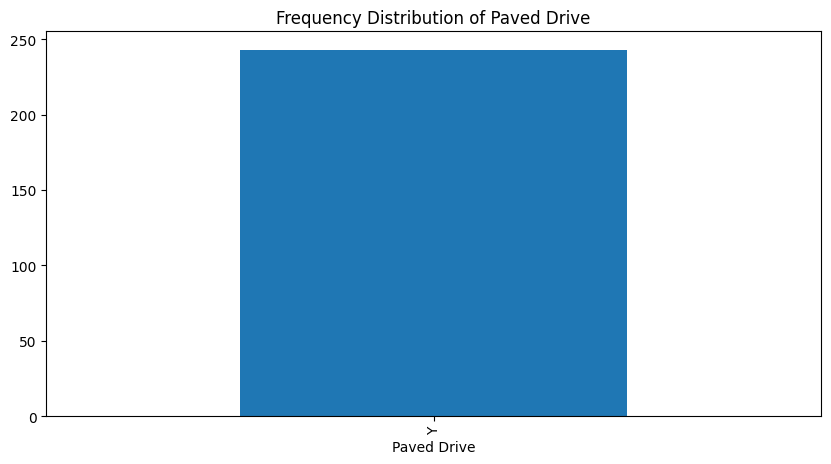

Series([], Name: count, dtype: int64)


IndexError: index 0 is out of bounds for axis 0 with size 0

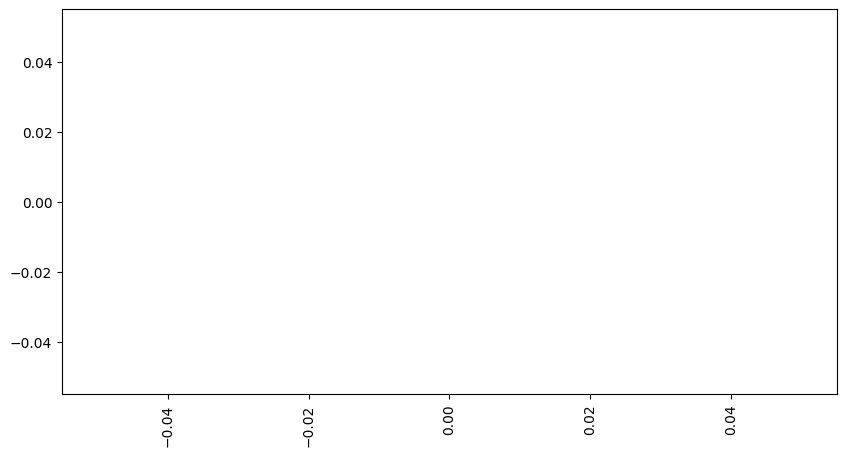

In [21]:
for col in Data.select_dtypes(include=['object']).columns:
    print(Data[col].value_counts())
    plt.figure(figsize=(10, 5))
    Data[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {col}')
    plt.show()

we run a loop, for each column whose data type is a string, we see how many time a certain value value appears in that column, we then plot this data in a bar chart. The for loop does this for each and every column

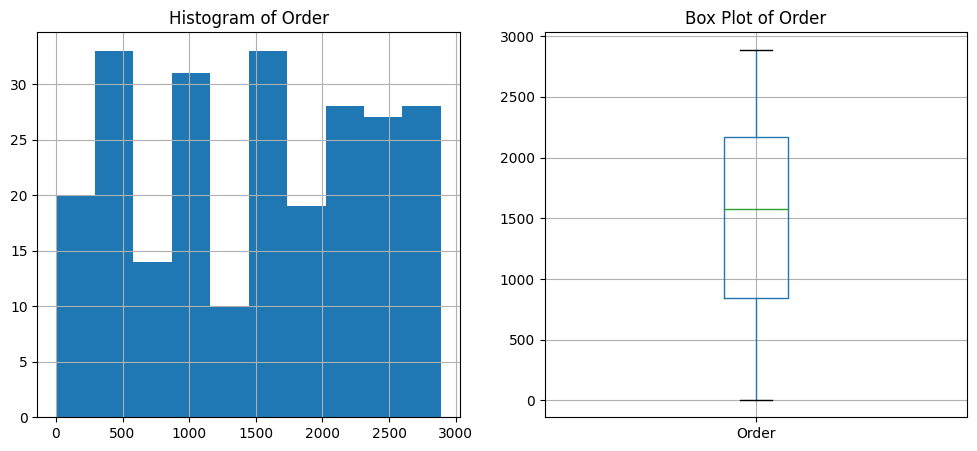

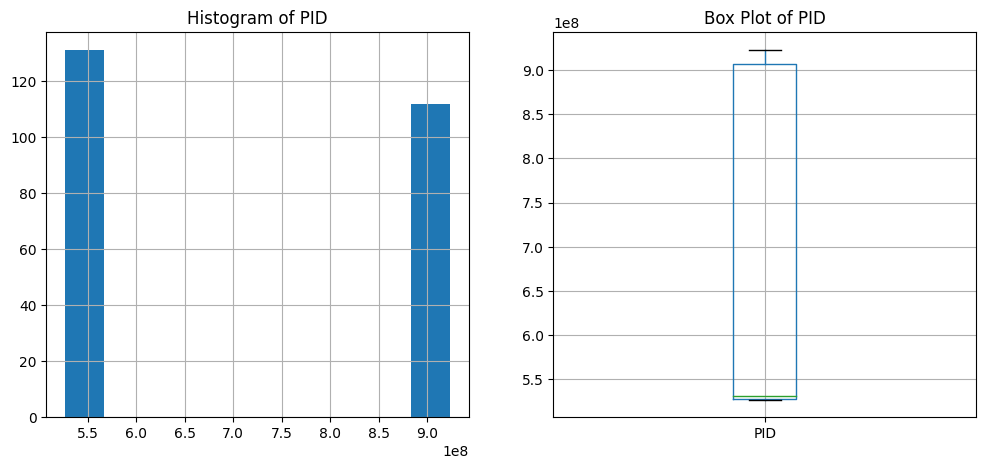

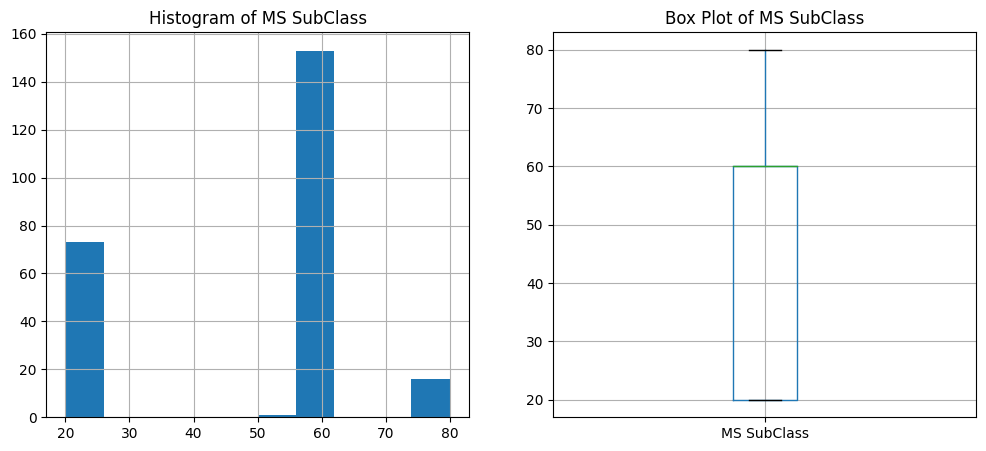

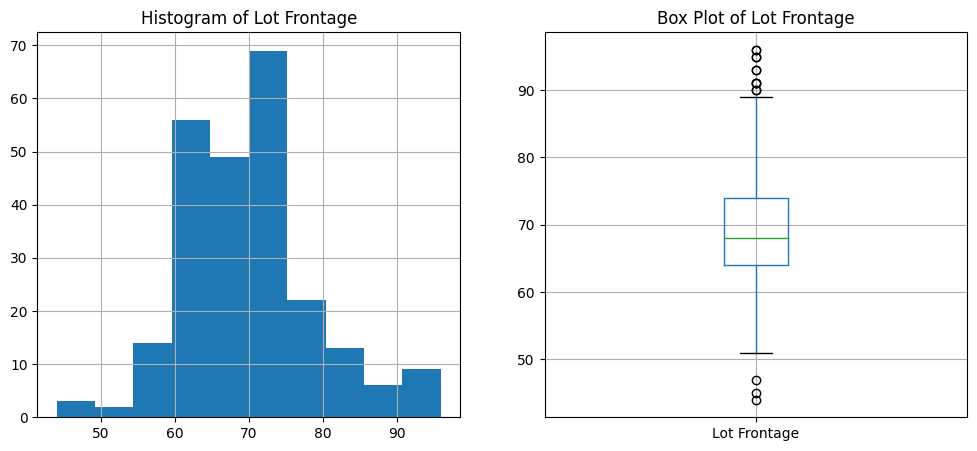

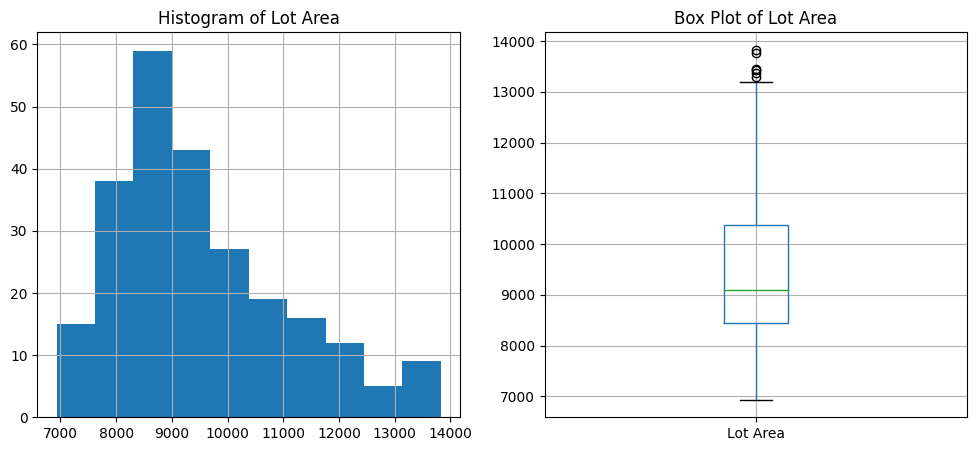

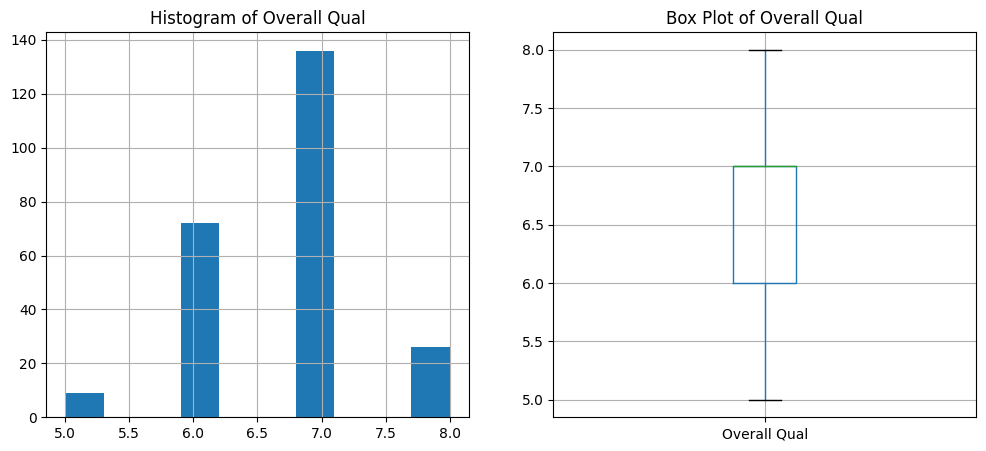

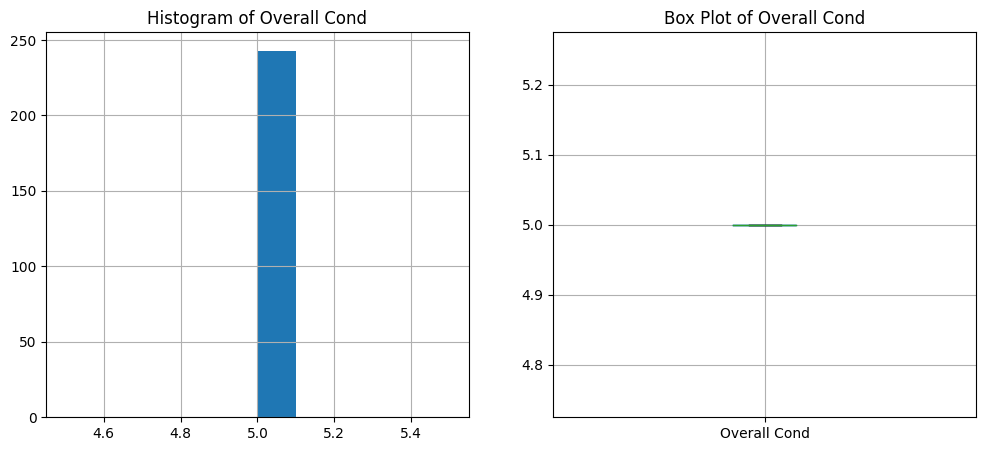

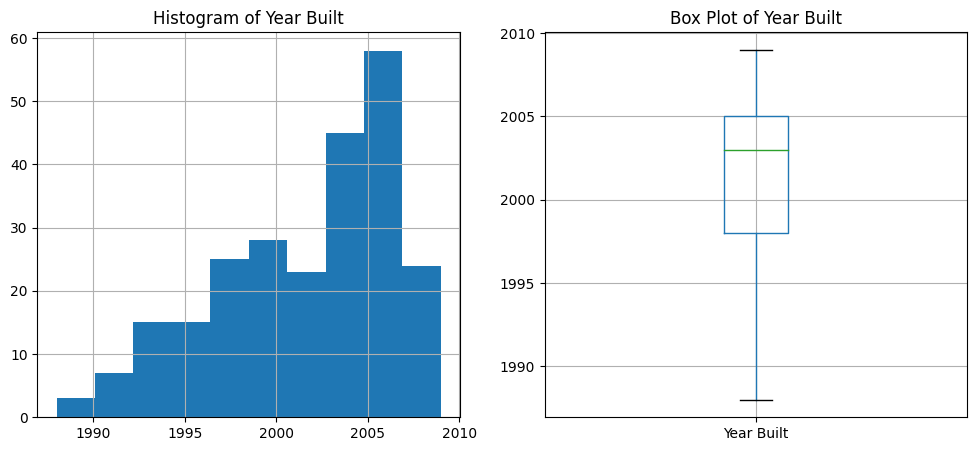

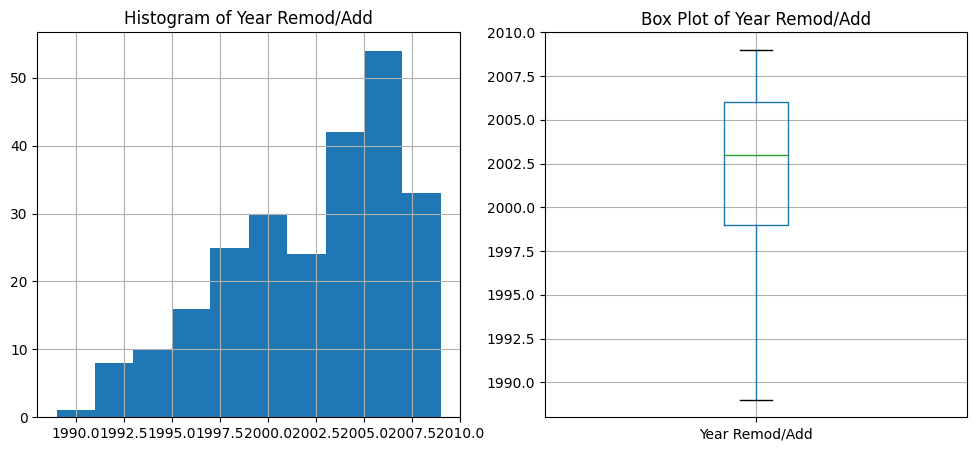

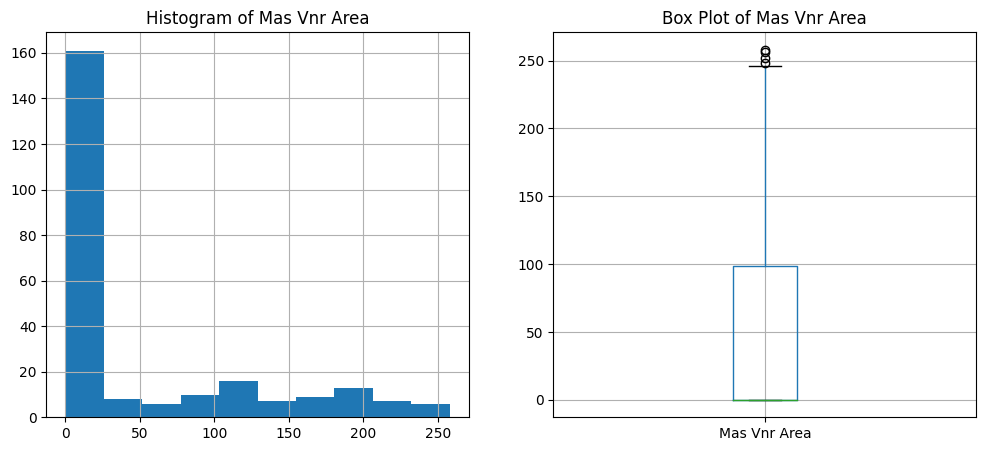

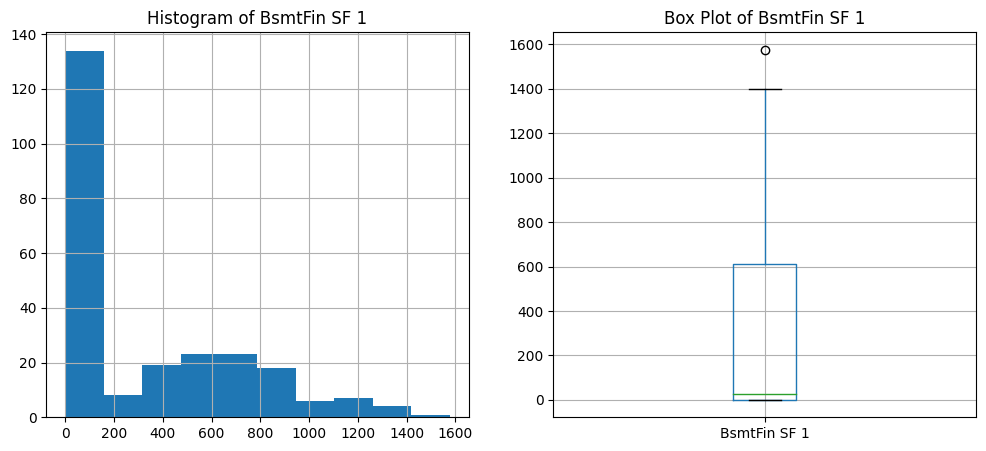

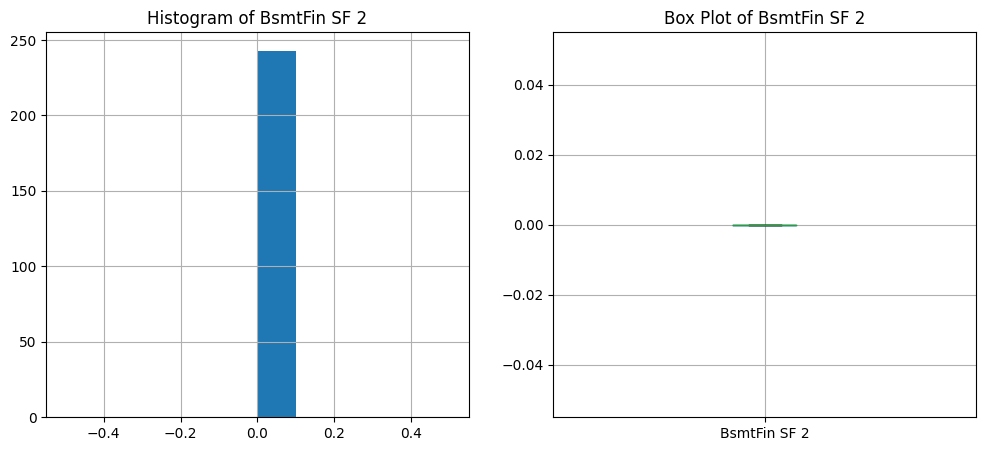

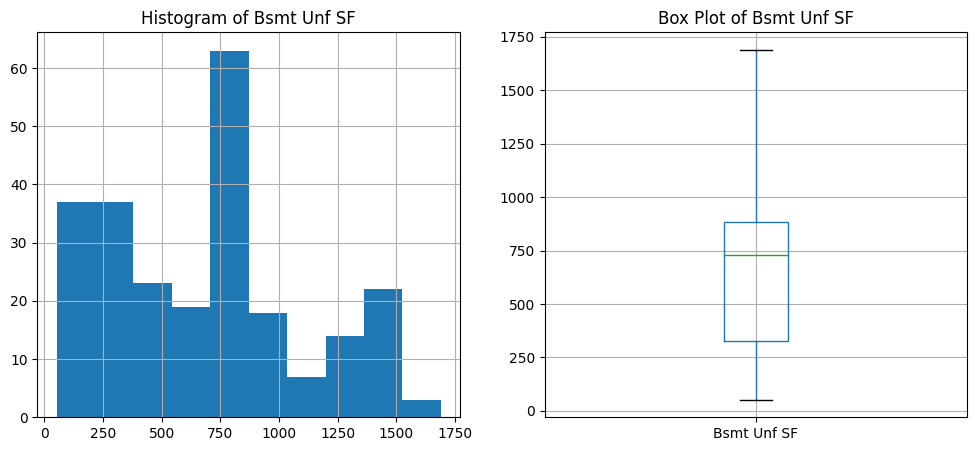

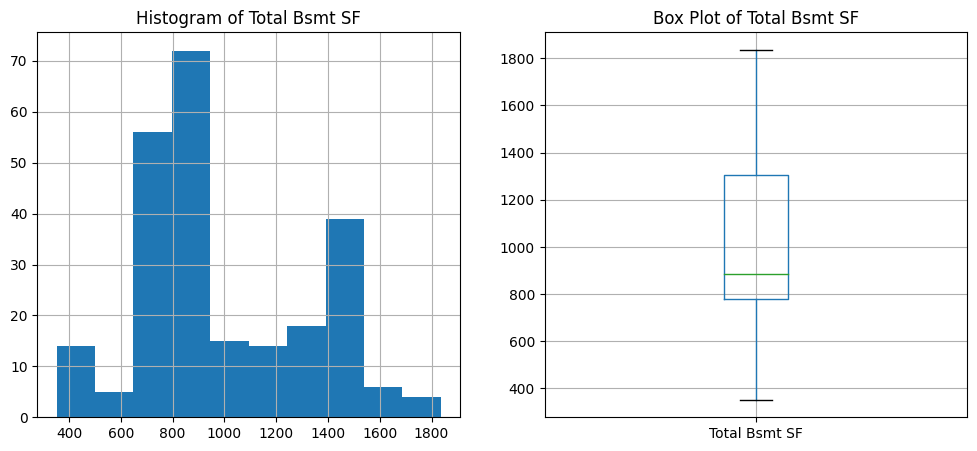

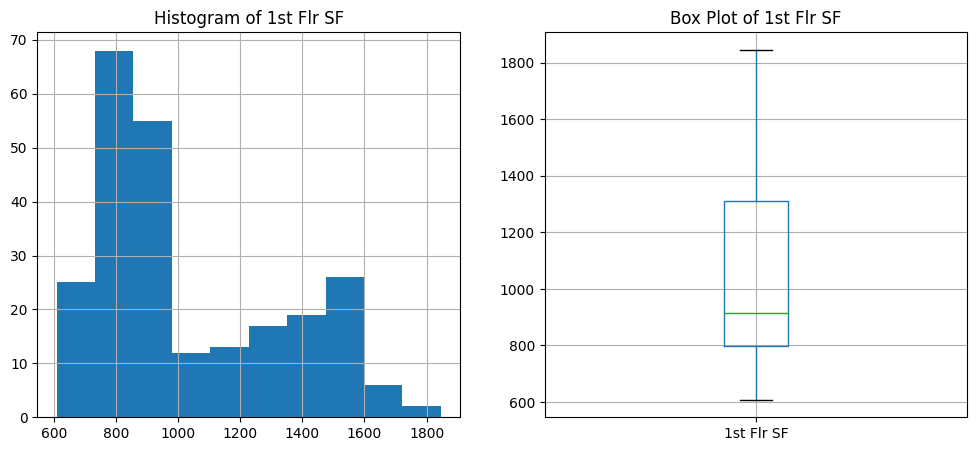

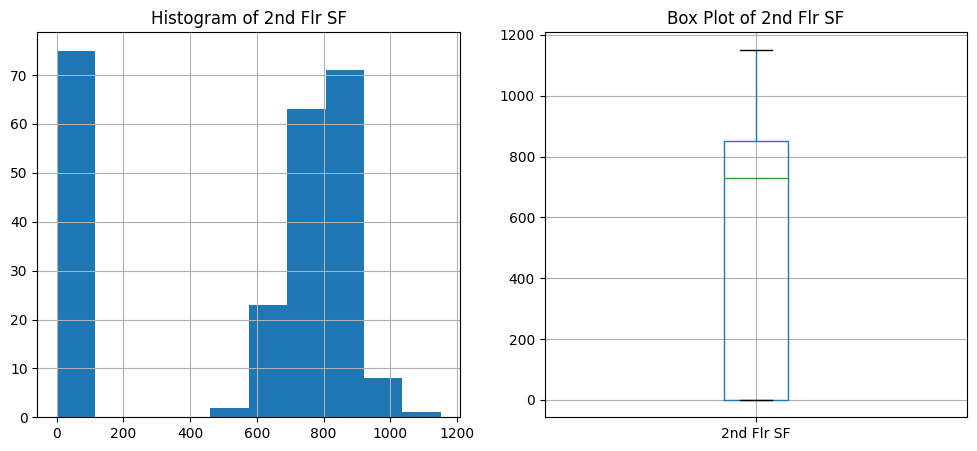

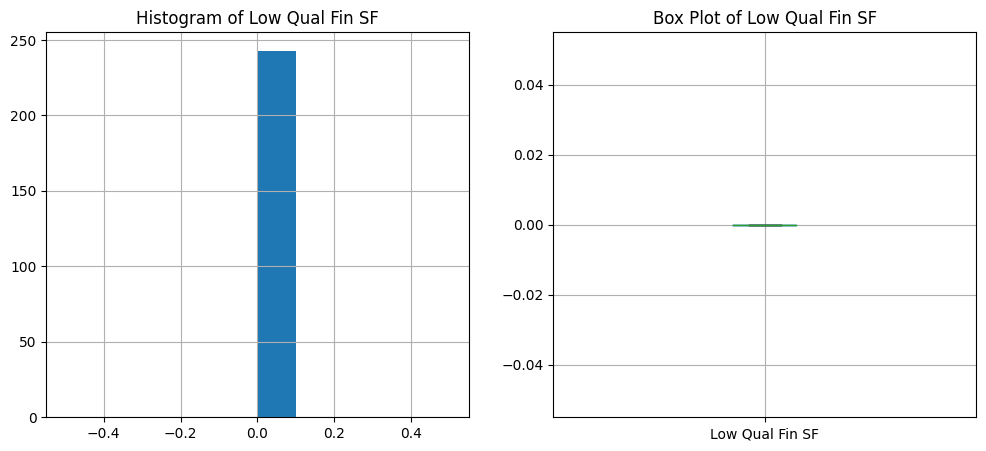

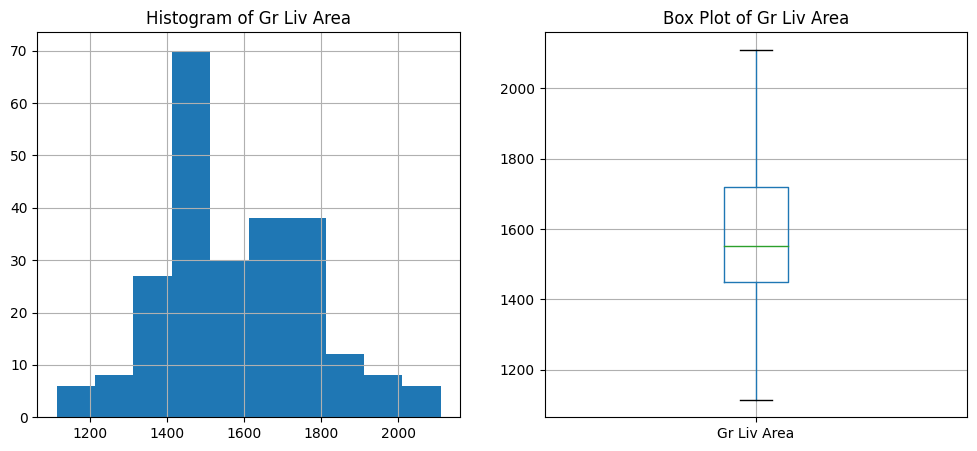

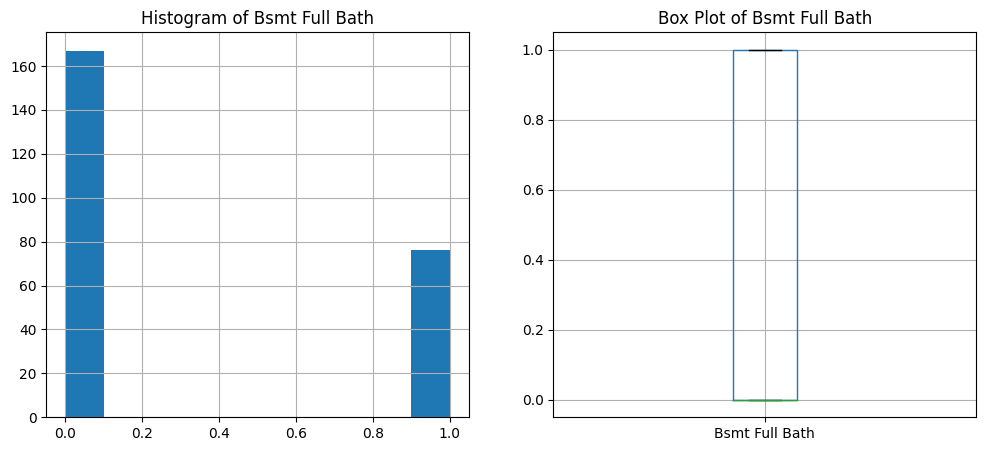

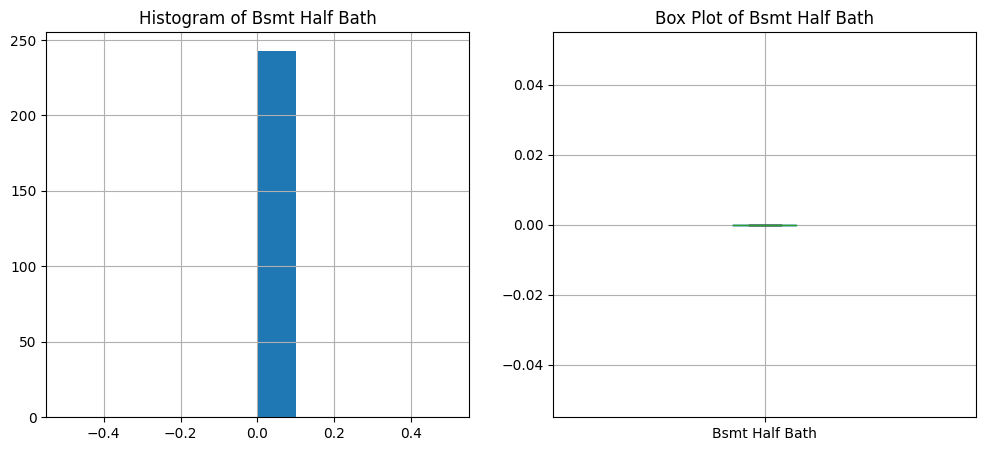

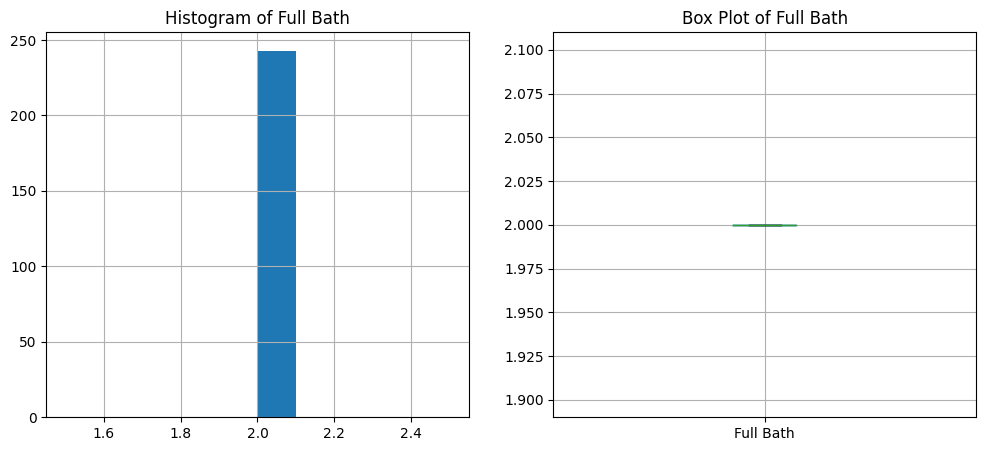

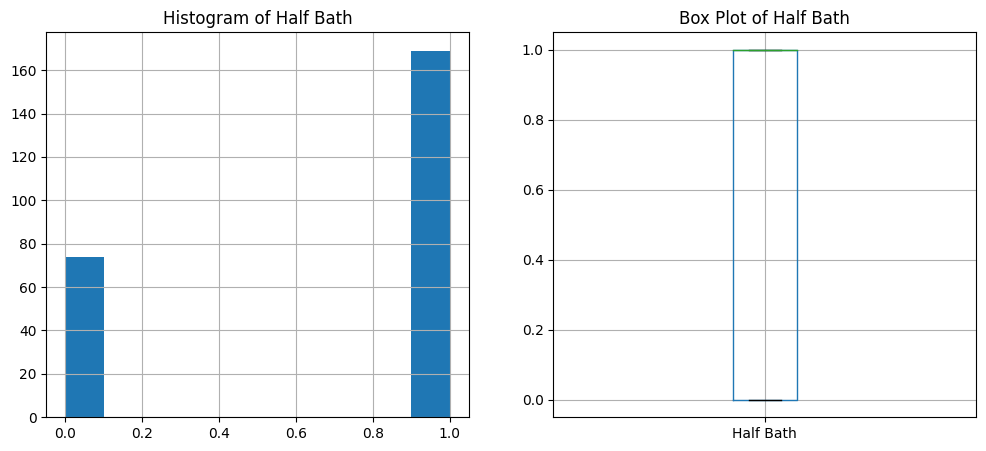

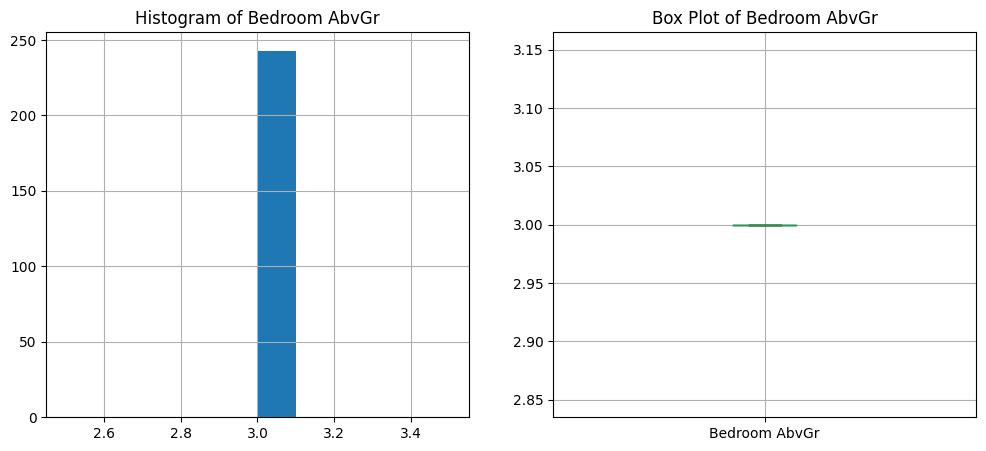

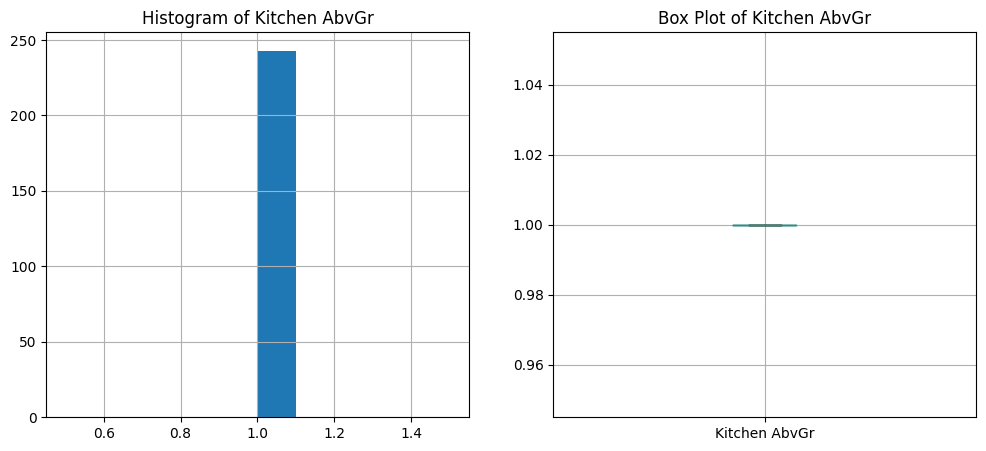

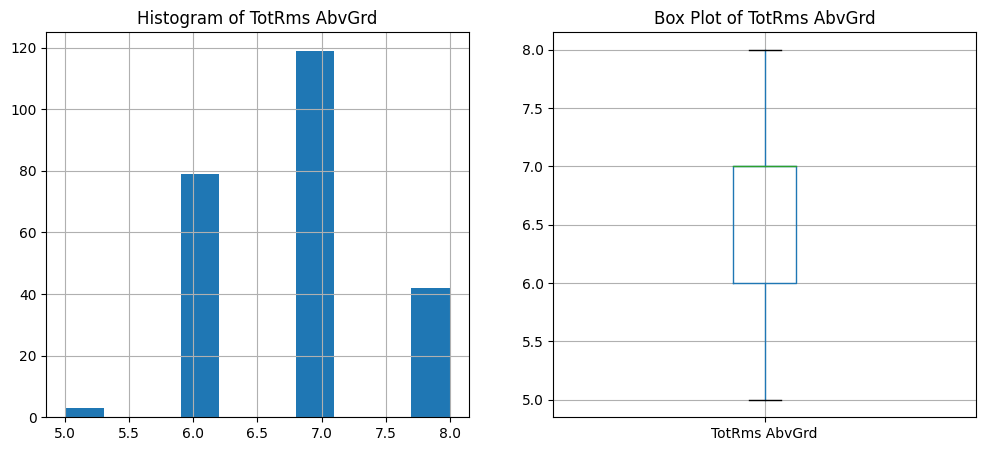

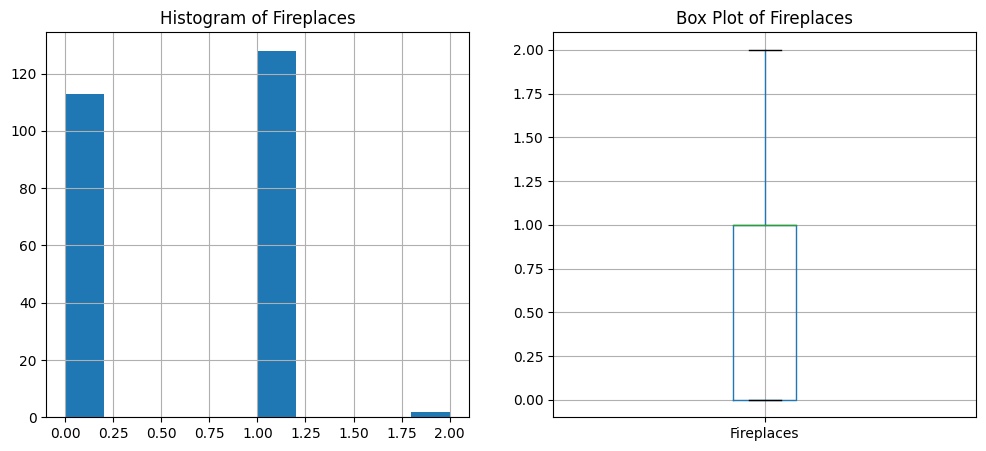

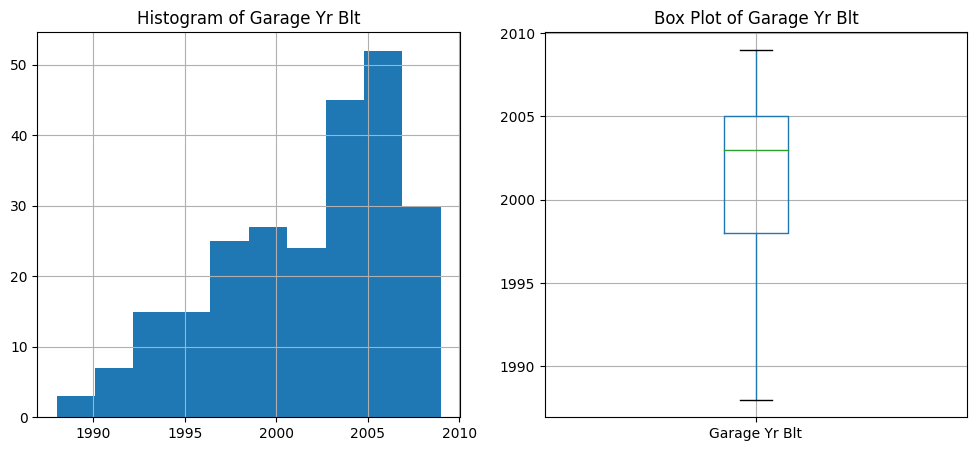

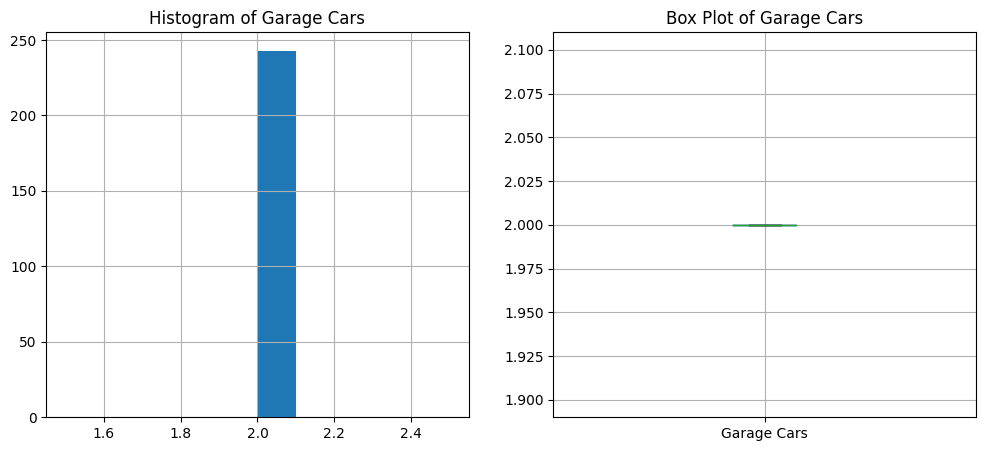

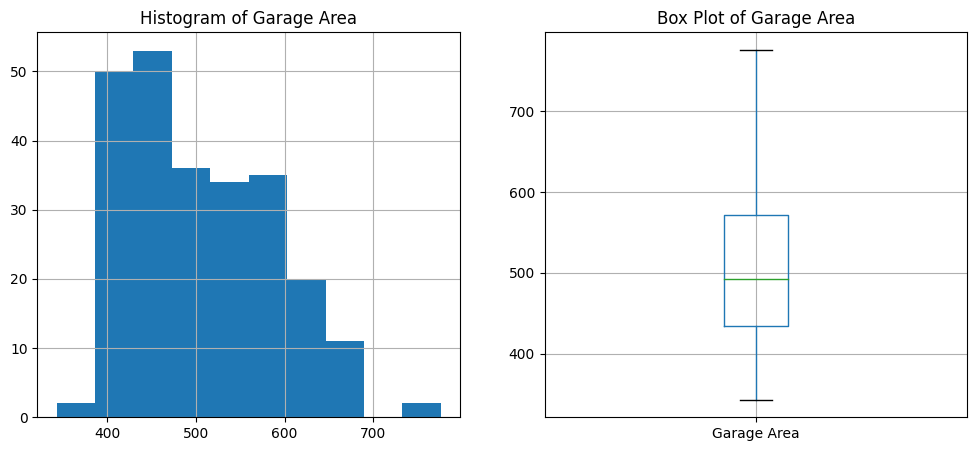

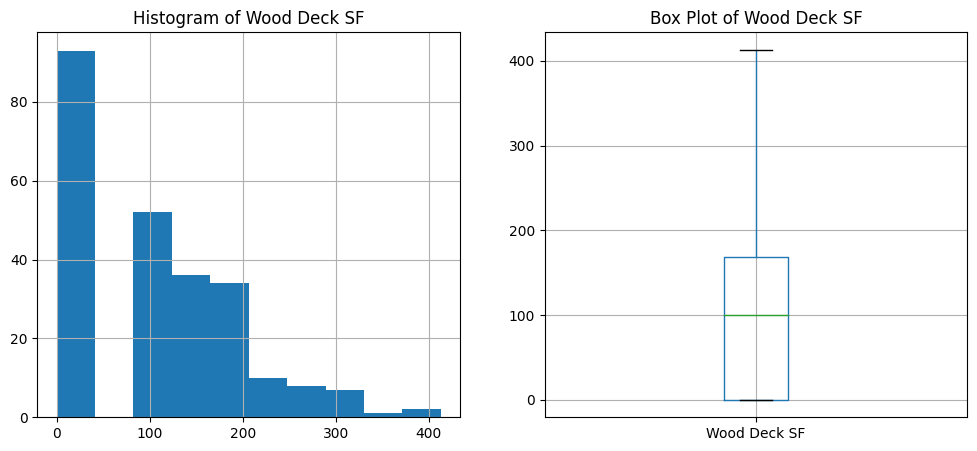

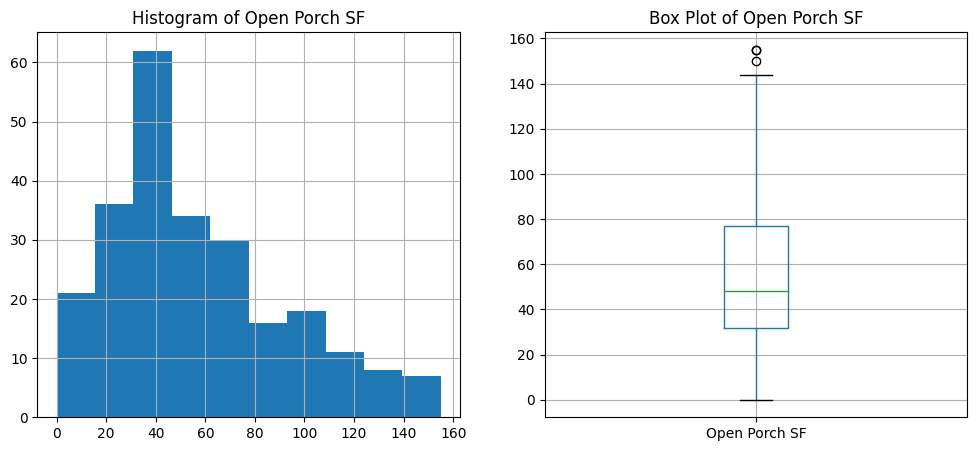

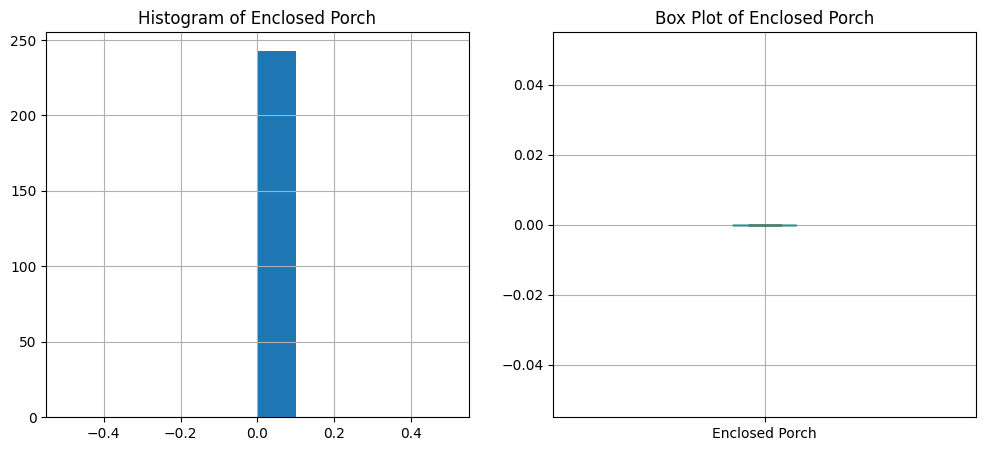

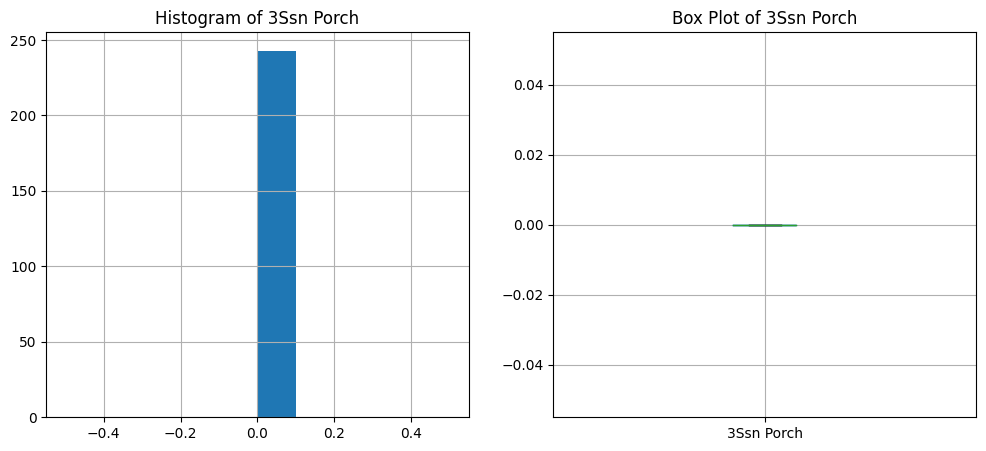

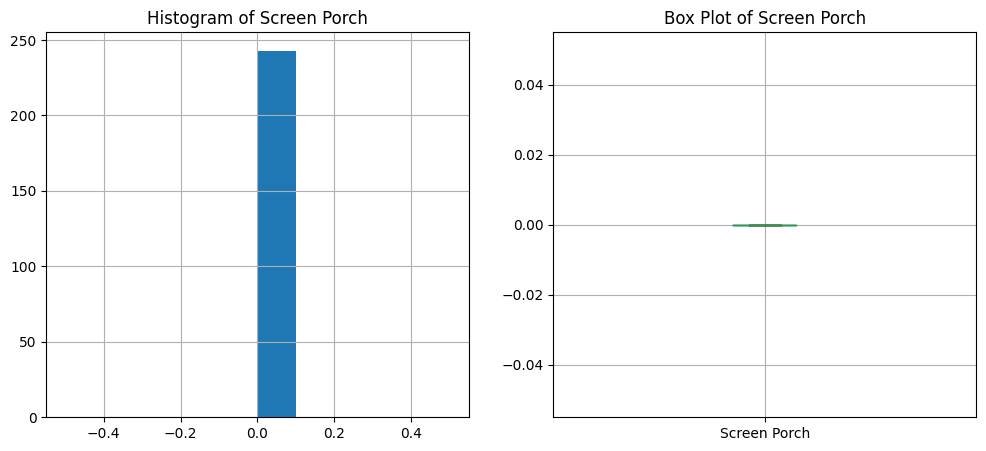

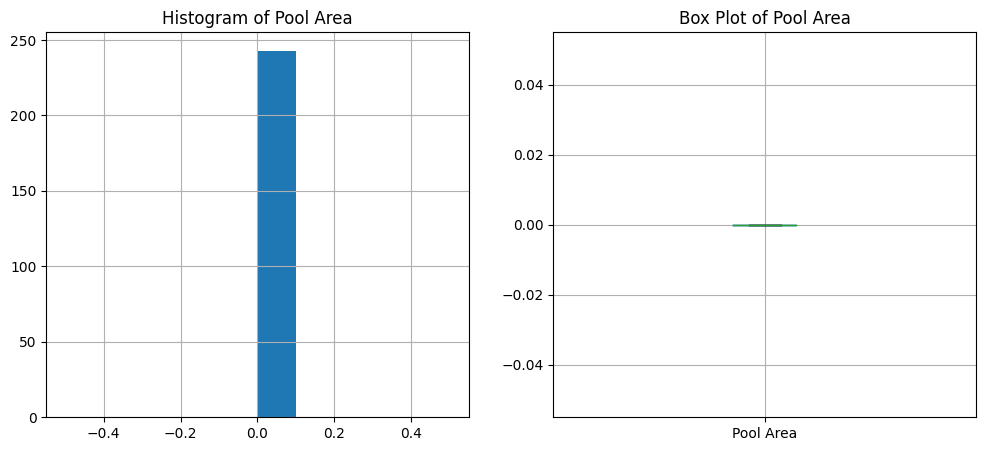

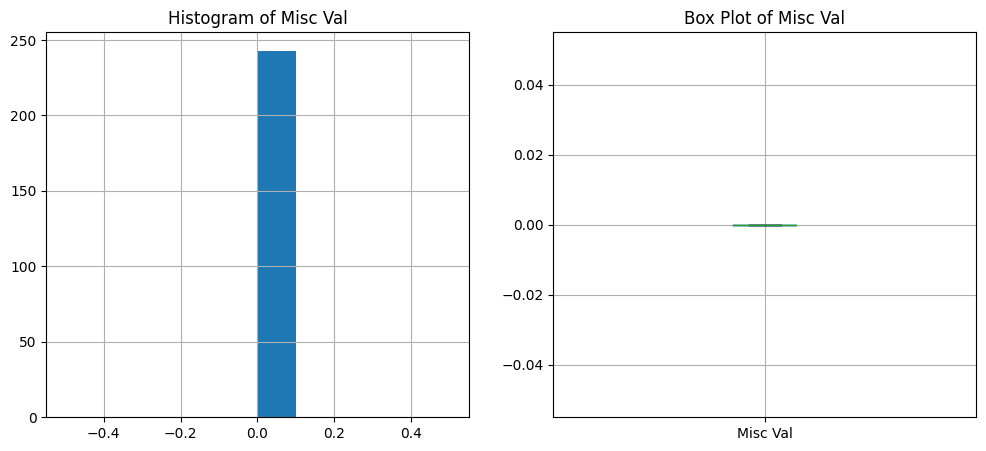

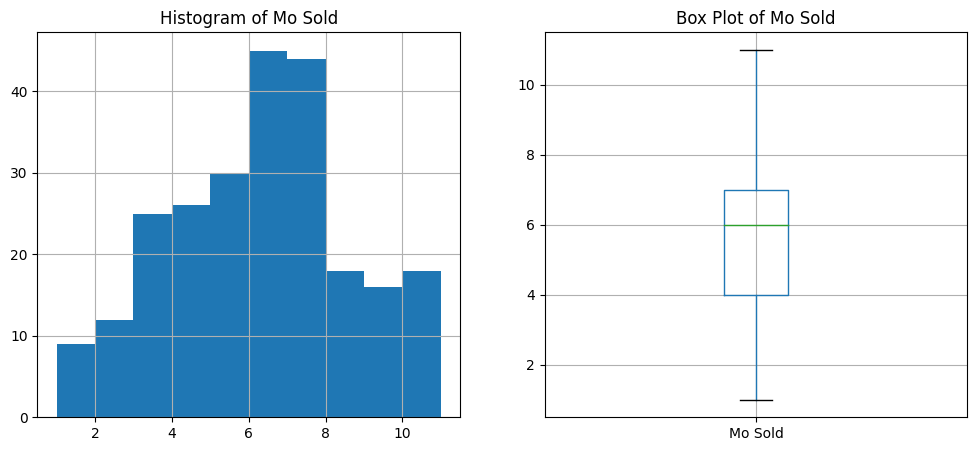

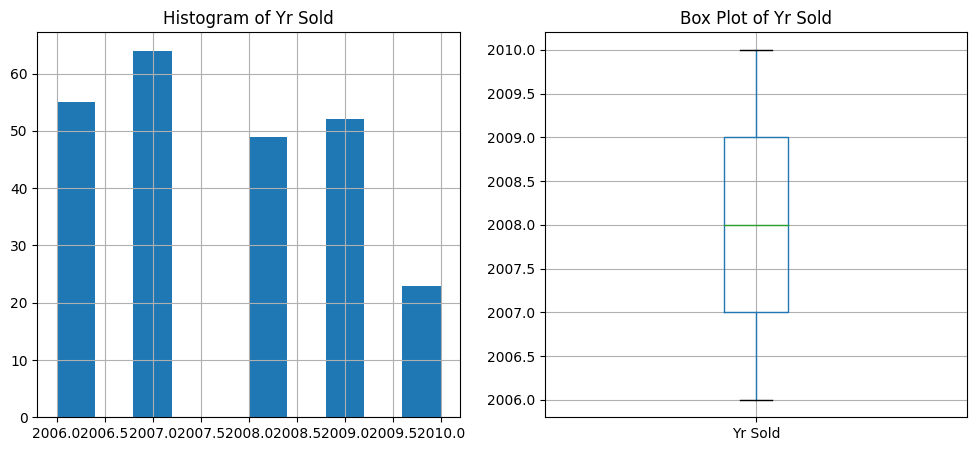

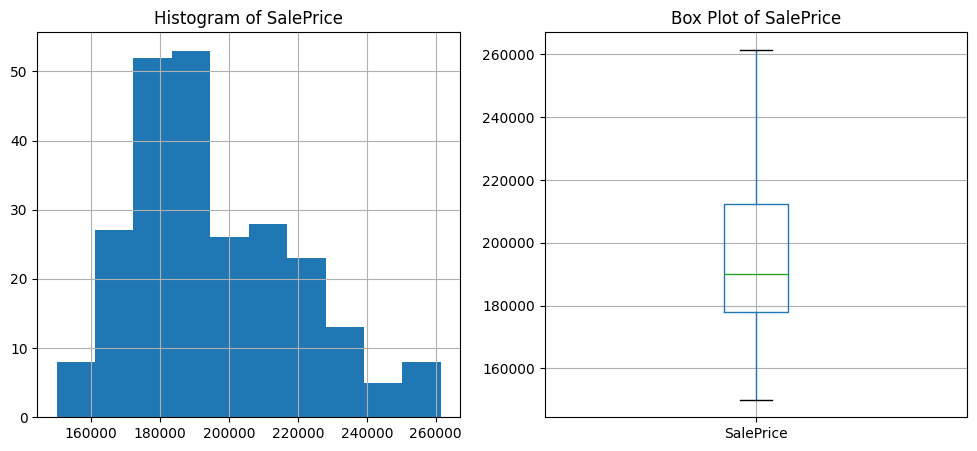

In [22]:
for col in numerical_columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    Data[col].hist()
    plt.title(f'Histogram of {col}')
    plt.subplot(122)
    Data.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

We earlier had made a list numerical_columns containing the names of all the columns with integer data type. Now, we make a histogram for each of those columns using a for loop 

Bivariate Analysis****

Corelation Matrix and a Heatmap Based on it

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


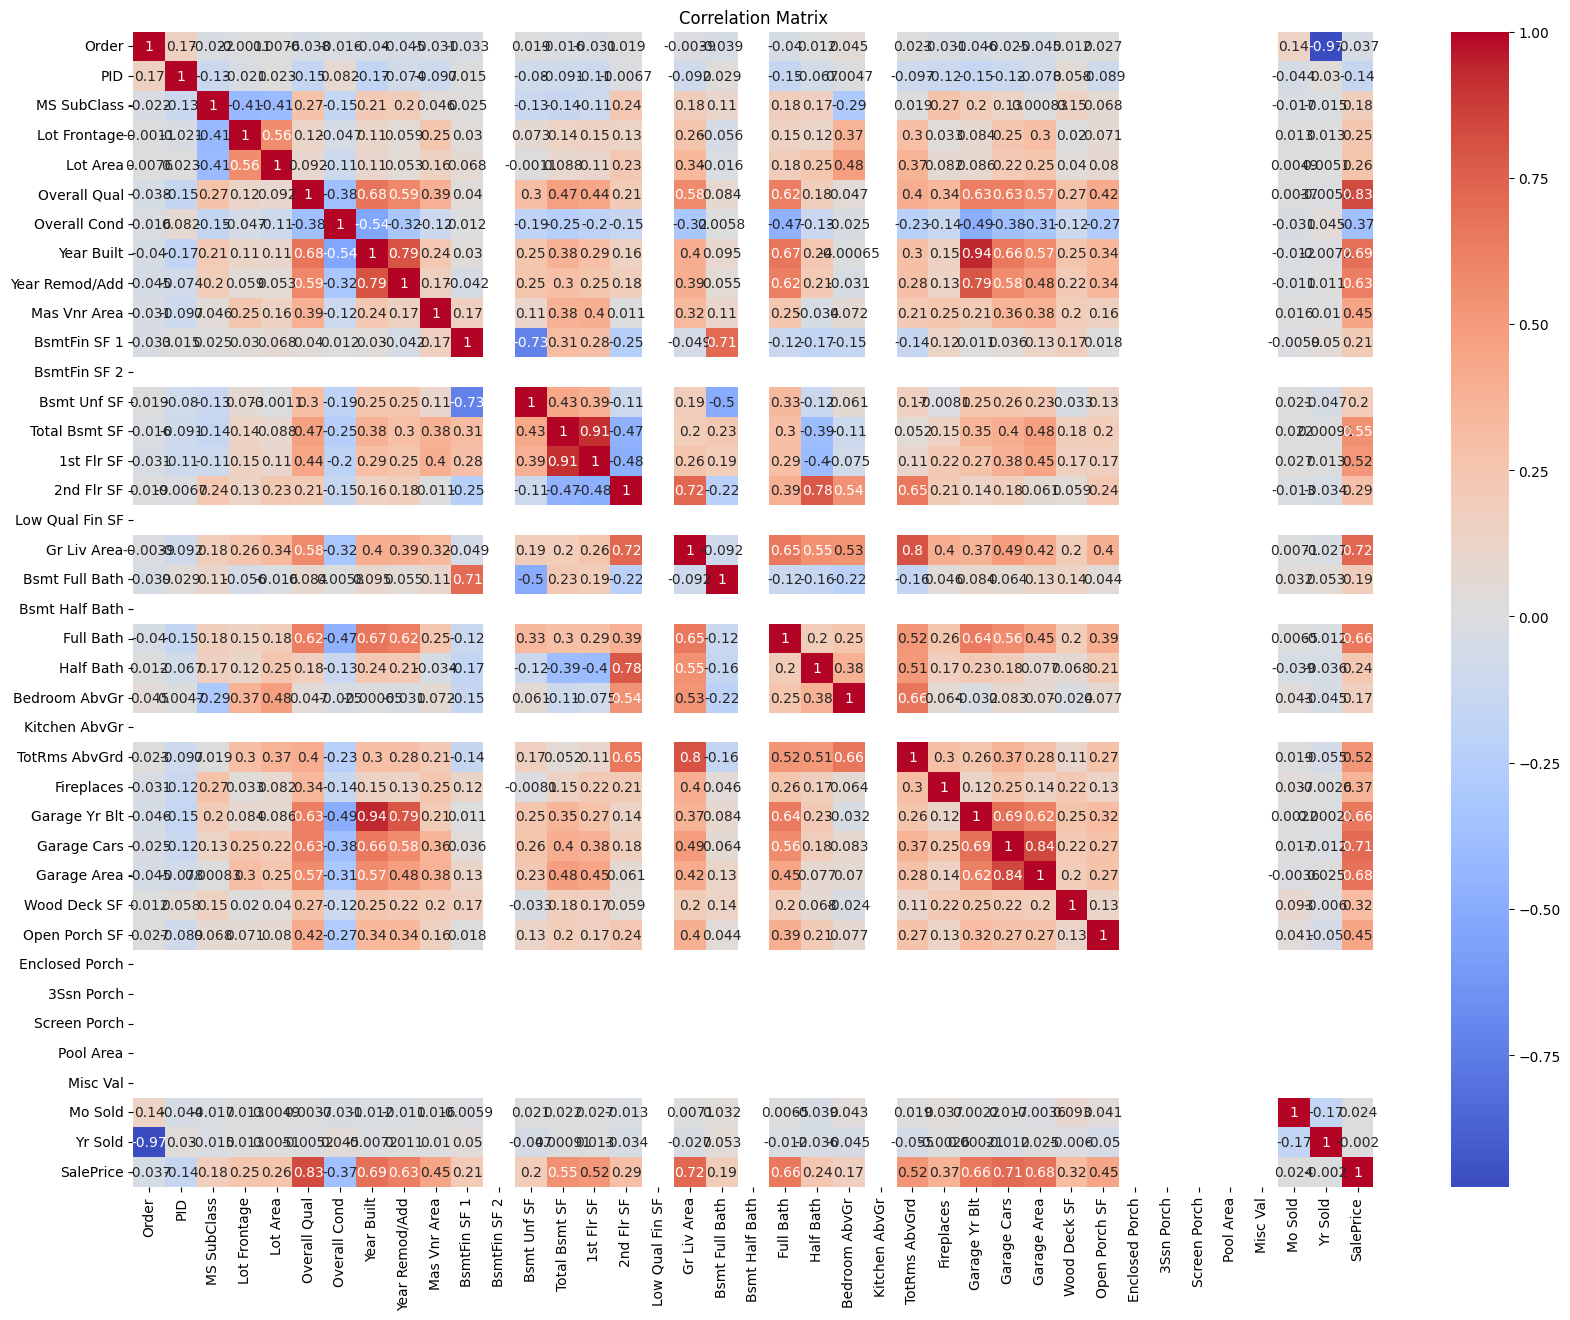

In [37]:
corr_matrix = Data[numerical_columns].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Corelation co-effcient: describe the linear relationship between two variable. Values range from -1 to +1. 
1: Perfect positive correlation (as one variable increases, the other increases).
-1: Perfect negative correlation (as one variable increases, the other decreases).
0: No correlation (variables are independent of each other).

Co-relation Matrix
A correlation matrix is a table that shows the correlation coefficients between pairs of variables. 

What is this code doing?
We earlier had made a list numerical_columns containing the names of all the columns with integer data type. Now, we make a correlation matrix containing each of those columns using a "for" loop. we then plot this in a heatmap, for better visualization. The line cmap = "coolwarm" means blue for negative values and red for positive values

What kind of analysis can we draw?
how each variable influences other value. Example: as overall quality increase so does the sales price. As year built increase, overall quality decreases, which make sense due to deteriotation of property.

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(Data['GrLivArea'], Data['SalePrice'])
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot: Living Area vs Sale Price')
plt.show()

KeyError: 'GrLivArea'

<Figure size 1000x600 with 0 Axes>

 make scatter plots for analysing how does sales price in comparsion with the Living area 

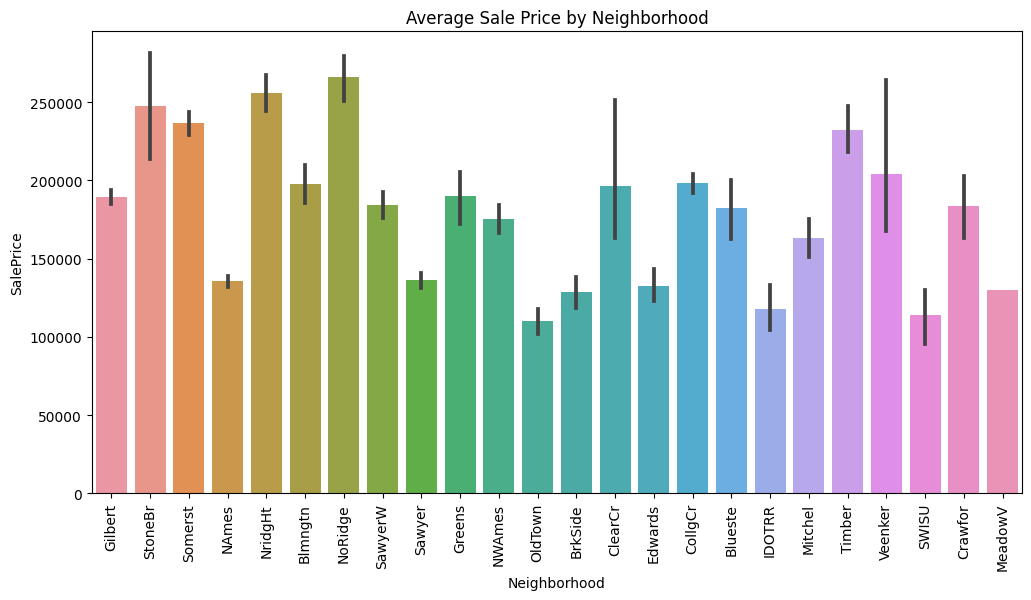

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Neighborhood', y='SalePrice', data=Data)
plt.xticks(rotation=90)
plt.title('Average Sale Price by Neighborhood')
plt.show()

Analysing if the sale price is influenced by the neighbourhood the lot is situated in

Multi-Variate Analysis****

In [44]:
sns.pairplot(Data[['SalePrice', 'OverallQual', 'GarageArea']])
plt.show()

KeyError: "['OverallQual', 'GarageArea'] not in index"

this code first selects certain columns, then plots pairwise the values of these columns.

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(Data[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()


Heatmap of correlations

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="OverallQual", y="SalePrice", data=Data)
plt.title('Sale Price Distribution by Overall Quality')
plt.show()

ValueError: Could not interpret input 'OverallQual'

<Figure size 1200x600 with 0 Axes>

from the plot of correlation matrix earlier we found a instance where sale price varies as the overall quality varies. we make a plot to study this